# Importar Liberías y Datos

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import colors
import seaborn as sns

In [2]:
Base_completa = pd.read_csv("Datamart_SalesAndContacts_FamilyTopics_v2.csv", sep=';',encoding='utf8')
Base_City = pd.read_csv("CorrectedCitiesDOI.csv", sep=';',encoding='utf8')
Base_Tarifa = pd.read_csv("GroupedFeeFamilyTopics.csv", sep=';',encoding='utf8')
Base_Promo = pd.read_csv("GroupedPromotionsFamilyTopics.csv", sep=';',encoding='utf8')
Base_v_city = pd.read_csv("VenueCities.csv", sep=';',encoding='utf8')
Base_DOI=pd.read_csv("DOI.csv", sep=',',encoding='latin1')
Base_DOI=pd.read_csv("ADOI.csv", sep=',',encoding='latin1')
Base_Softix=pd.read_csv("Softix.csv", sep=';',encoding='utf8')

C:\Users\JuanDavidCaballero\AppData\Local\Temp\ipykernel_34248\387240731.py:1: DtypeWarning: Columns (17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  Base_completa = pd.read_csv("Datamart_SalesAndContacts_FamilyTopics_v2.csv", sep=';',encoding='utf8')


In [3]:
#Se Crean Variables relevantes para el análisis
Base_Softix['Total_Boletas']=Base_Softix['NET_SOLD_T_QTY']-Base_Softix['NET_SOLD_C_QTY']
Base_Softix['Fecha'] = pd.to_datetime(Base_Softix['ORDER_DATE_TIME'], format='%d/%m/%Y %H:%M')
Base_Softix['DMY'] = Base_Softix['Fecha'].dt.year.astype(str) + \
    (Base_Softix['Fecha'].dt.month.apply(lambda x: '0' + str(x) if x < 10 else str(x))) + \
    (Base_Softix['Fecha'].dt.day.apply(lambda x: '0' + str(x) if x < 10 else str(x)))
Base_Softix['Fecha_evento']=pd.to_datetime(Base_Softix['PRODUCT_DATE_TIME'], format='%d/%m/%Y %H:%M')
Base_Softix['Fecha_compra'] =pd.to_datetime(Base_Softix['ORDER_DATE_TIME'], format='%d/%m/%Y %H:%M')
Base_Softix['DAYS_BEFORE_EVENT']=(Base_Softix['Fecha_evento'] - Base_Softix['Fecha_compra']).dt.days

In [4]:
Base_Softix

,T_PRODUCT_ID,PRODUCT,PRODUCT_CODE,ORGANIZATION,INVOICE_CONTACT_FMT_NAME,TOPIC,SUB_TOPIC,PRODUCT_DATE_TIME,ORDER_DATE_TIME,SALES_CHANNEL_TYPE,...,INSURED_AMT_ITX,FULLNAME,GROUPED_RATE,GROUPED_PROMOTION,DAYS_BEFORE_EVENT,Total_Boletas,Fecha,DMY,Fecha_evento,Fecha_compra
0,EOCS2017924PR,DISNEY ON ICE,BDISNEYBO,Softix,OCESA,CIRCOS,TICKETFA,13/07/2017 10:00,13/10/2017 9:27,G,...,NaN,GERMAN GOMEZ,NaN,NaN,-92,3,2017-10-13 09:27:00,20171013,2017-07-13 10:00:00,2017-10-13 09:27:00
1,EOCS2017924PR,DISNEY ON ICE,BDISNEYBO,Softix,OCESA,CIRCOS,TICKETFA,13/07/2017 10:00,3/11/2017 12:08,Q,...,NaN,MAGDALENA GOMEZ,NaN,NaN,-114,3,2017-11-03 12:08:00,20171103,2017-07-13 10:00:00,2017-11-03 12:08:00
2,EOCS2017925PD,DISNEY ON ICE,BDISNEYBO,Softix,OCESA,CIRCOS,TICKETFA,13/07/2017 10:00,7/08/2017 7:29,W,...,NaN,SR CARLOS QUINTERO,NaN,NaN,-25,4,2017-08-07 07:29:00,20170807,2017-07-13 10:00:00,2017-08-07 07:29:00
3,EOCS2017925PD,DISNEY ON ICE,BDISNEYBO,Softix,OCESA,CIRCOS,TICKETFA,13/07/2017 10:00,3/11/2017 21:46,W,...,NaN,DR JOSE ROJAS,NaN,NaN,-114,2,2017-11-03 21:46:00,20171103,2017-07-13 10:00:00,2017-11-03 21:46:00
4,EOCS2017923PQ,DISNEY ON ICE,BDISNEYBO,Softix,OCESA,CIRCOS,TICKETFA,13/07/2017 10:00,15/08/2017 12:22,W,...,NaN,SR PEDRO JOSE BOLIVAR BERMUDEZ,NaN,NaN,-34,4,2017-08-15 12:22:00,20170815,2017-07-13 10:00:00,2017-08-15 12:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21695,EOCS2017903A,DISNEY ON ICE,ADOIME17,Softix,OCESA,DEPORT,TICKETFA,10/04/2016 0:00,9/08/2017 9:02,W,...,NaN,SRA MARIA CLARA ROSAS,NaN,NaN,-487,3,2017-08-09 09:02:00,20170809,2016-04-10 00:00:00,2017-08-09 09:02:00
21696,EOCS2017902A,DISNEY ON ICE,ADOIME17,Softix,OCESA,DEPORT,TICKETFA,10/04/2016 0:00,26/08/2017 18:29,Q,...,NaN,ELIANA VASQUEZ,NaN,NaN,-504,2,2017-08-26 18:29:00,20170826,2016-04-10 00:00:00,2017-08-26 18:29:00
21697,EOCS2017903C,DISNEY ON ICE,ADOIME17,Softix,OCESA,DEPORT,TICKETFA,10/04/2016 0:00,23/09/2017 16:07,W,...,NaN,SRTA ALEXANDRA BETANCUR,NaN,NaN,-532,3,2017-09-23 16:07:00,20170923,2016-04-10 00:00:00,2017-09-23 16:07:00
21698,EOCS2017903B,DISNEY ON ICE,ADOIME17,Softix,OCESA,DEPORT,TICKETFA,10/04/2016 0:00,21/07/2017 17:46,W,...,NaN,SRA BLANCA NIDIA YEPES,NaN,NaN,-468,4,2017-07-21 17:46:00,20170721,2016-04-10 00:00:00,2017-07-21 17:46:00


In [5]:
# Base_Softix.info()
Base_DOI

,T_PRODUCT_ID,PRODUCT,PRODUCT_CODE,ORGANIZATION,INVOICE_CONTACT_FMT_NAME,TOPIC,SUB_TOPIC,PRODUCT_DATE_TIME,ORDER_DATE_TIME,SALES_CHANNEL_TYPE,...,MAIN_ADDR_COUNTRY,MAIN_ADDR_ZIPCODE,ORDER_TYPE,ORDER_NUMBER,TAX_RATE,SSO_PROVIDER,FILE_STATE,IP_ADDRESS,INSURED,INSURED_AMT_ITX
0,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,08/09/2023 19:00:00,21/07/2023 22:44:52,Internet gran público,...,Colombia,111111,SALE,21098652,0,NaN,Pagado,186.84.21.213,T,59363.0
1,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,05/09/2023 19:00:00,31/07/2023 22:52:53,Internet gran público,...,Colombia,111111,SALE,21190559,0,NaN,Pagado,181.61.204.217,F,0.0
2,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,07/09/2023 18:30:00,29/07/2023 06:57:18,Internet gran público,...,Colombia,111111,SALE,21155598,0,NaN,Pagado,152.203.83.106,F,0.0
3,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,10/09/2023 10:30:00,16/06/2023 12:19:53,Internet gran público,...,Colombia,111111,SALE,19781956,0,NaN,Pagado,201.244.217.4,T,85607.0
4,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,10/09/2023 10:30:00,16/06/2023 13:07:00,Internet gran público,...,Colombia,111111,SALE,19782728,0,NaN,Pagado,186.86.34.52,F,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11356,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,09/09/2023 19:00:00,14/08/2023 13:00:36,Internet gran público,...,Colombia,111111,SALE,21504094,0,GOOGLE,Pagado,190.27.163.216,F,0.0
11357,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,08/09/2023 15:00:00,19/08/2023 18:12:32,Taquillas,...,Colombia,111111,SALE,21584054,0,NaN,Pagado,NaN,F,0.0
11358,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,09/09/2023 19:00:00,14/08/2023 18:35:34,Internet gran público,...,Colombia,111111,SALE,21508371,0,NaN,Pagado,186.82.161.157,F,0.0
11359,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,06/09/2023 18:30:00,24/05/2023 11:53:21,Internet gran público,...,Colombia,111111,SALE,19242735,0,NaN,Pagado,186.84.20.13,T,85607.0


In [6]:
Base_Softix.SITE.unique()

array(['CARPA SALITRE MAGICO', 'PUERTA DE ORO', 'COLISEO IVAN DE BEDOUT'],
      dtype=object)

In [7]:
Base_Softix=Base_Softix

In [8]:
info_ventas_2017=Base_Softix[Base_Softix.SITE.str.contains('CARPA SALITRE MAGICO')].groupby(['PRODUCT','DMY']).agg({'Total_Boletas':'sum'}).reset_index()

In [9]:
Base_completa.head()

,T_PRODUCT_ID,PRODUCT,PRODUCT_CODE,ORGANIZATION,INVOICE_CONTACT_FMT_NAME,TOPIC,SUB_TOPIC,PRODUCT_DATE_TIME,ORDER_DATE_TIME,SALES_CHANNEL_TYPE,...,MAIN_ADDR_COUNTRY,MAIN_ADDR_ZIPCODE,ORDER_TYPE,ORDER_NUMBER,TAX_RATE,SSO_PROVIDER,FILE_STATE,IP_ADDRESS,INSURED,INSURED_AMT_ITX
0,101334930342,Circo de Dinosaurios,TDINOBQ,Tuboleta.com,WILMER GRANDA ( 103494 ),Familia,Infantil,21/06/2019 17:00:00,01/06/2019 12:44:22,Taquillas,...,Colombia,080001,SALE,287725,0,NaN,Anulado,NaN,F,0.0
1,101334930342,Circo de Dinosaurios,TDINOBQ,Tuboleta.com,WILMER GRANDA ( 103494 ),Familia,Infantil,21/06/2019 17:00:00,14/06/2019 11:17:44,Taquillas,...,Colombia,080001,SALE,339825,0,NaN,Anulado,NaN,F,0.0
2,101365180246,Juan Caracol Teatro Musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,28/11/2019 16:32:00,Taquillas,...,Colombia,080001,SALE,1212332,0,NaN,Anulado,NaN,F,0.0
3,101365180246,Juan Caracol Teatro Musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,08/11/2019 12:00:30,Taquillas,...,Colombia,080001,REFUND_CLIENT,1028739,0,NaN,Anulado,NaN,F,0.0
4,101365180246,Juan Caracol Teatro Musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,29/11/2019 17:17:17,Taquillas,...,Colombia,080001,REFUND_CLIENT,1220711,0,NaN,Anulado,NaN,F,0.0


In [10]:
Base_completa['Registro']=Base_completa['T_PRODUCT_ID'].astype(str)+"-"+Base_completa['FILE_NUMBER'].astype(str)
Base_completa.head()

,T_PRODUCT_ID,PRODUCT,PRODUCT_CODE,ORGANIZATION,INVOICE_CONTACT_FMT_NAME,TOPIC,SUB_TOPIC,PRODUCT_DATE_TIME,ORDER_DATE_TIME,SALES_CHANNEL_TYPE,...,MAIN_ADDR_ZIPCODE,ORDER_TYPE,ORDER_NUMBER,TAX_RATE,SSO_PROVIDER,FILE_STATE,IP_ADDRESS,INSURED,INSURED_AMT_ITX,Registro
0,101334930342,Circo de Dinosaurios,TDINOBQ,Tuboleta.com,WILMER GRANDA ( 103494 ),Familia,Infantil,21/06/2019 17:00:00,01/06/2019 12:44:22,Taquillas,...,080001,SALE,287725,0,NaN,Anulado,NaN,F,0.0,101334930342-285538
1,101334930342,Circo de Dinosaurios,TDINOBQ,Tuboleta.com,WILMER GRANDA ( 103494 ),Familia,Infantil,21/06/2019 17:00:00,14/06/2019 11:17:44,Taquillas,...,080001,SALE,339825,0,NaN,Anulado,NaN,F,0.0,101334930342-333352
2,101365180246,Juan Caracol Teatro Musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,28/11/2019 16:32:00,Taquillas,...,080001,SALE,1212332,0,NaN,Anulado,NaN,F,0.0,101365180246-1204825
3,101365180246,Juan Caracol Teatro Musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,08/11/2019 12:00:30,Taquillas,...,080001,REFUND_CLIENT,1028739,0,NaN,Anulado,NaN,F,0.0,101365180246-880034
4,101365180246,Juan Caracol Teatro Musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,29/11/2019 17:17:17,Taquillas,...,080001,REFUND_CLIENT,1220711,0,NaN,Anulado,NaN,F,0.0,101365180246-1204825


In [11]:
print(Base_completa['Registro'].nunique())
print(Base_completa['T_PRODUCT_ID'].nunique())
print(Base_completa['FILE_NUMBER'].nunique())

256600
299
254125


In [12]:
#Base_completa.info()

## Uso de API par obtener onfromación de código Postal

In [ ]:
import requests
import json

# URL de la API
api_url = "http://ip-api.com/json/"

# Definimos los parametros de respuesta que queremos obtener
parametros = 'status,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as,query'
data = {"fields":parametros}

def ip_scraping(ip=""):
    # Nos conectamos con la API
    res = requests.get(api_url+ip, data=data)
    # Obtenemos y procesamos la respuesta JSON
    api_json_res = json.loads(res.content)
    return api_json_res

#if __name__ == '__main__':
 # Solicitamos la entrada
 #ip = input("Ingrese la dirección IP: ")
 
 # Llamamos a la función ip_scraping y mostramos los resultados
ip='86.196.183.61'

par = parametros.split(",")
for x in par:
    print(x.upper(), ":")
    print(ip_scraping(ip)[x])
    print("n")

In [13]:
Base_v_city['VENUE'].nunique()
#Base_v_city.info()

213

In [14]:
Base_v_city.drop_duplicates(subset=['VENUE'])

,VENUE,CIUDAD
0,4.40 MUSIC HALL CR 13 # 83-47,BOGOTA
1,Aeropuerto Internacional José María Córdova,ANTIOQUIA
2,Amazona,BOGOTA
3,AUDITORIO BIBLIOPARQUE MARQUES DE SAN JORGE,FUNZA
4,Auditorio Fabio Lozano - Cra 4 n 22 - 40,BOGOTA
...,...,...
225,VIA 40 MINI PALCOS,BARRANQUILLA
226,VIA 40 SOMBRERO VUELTIAO,BARRANQUILLA
227,VIA 40 TRONCO DE PALCO,BARRANQUILLA
228,WOW RESTAURANTE BAR,BOGOTA


In [15]:
Base_Tarifa.nunique()

AUDIENCE_SUB_CATEGORY    200
TARIFA_AGRUPADA           12
dtype: int64

In [16]:
Base_Promo.nunique()

PROMOTION    298
Nuevo         15
dtype: int64

In [17]:
Base_Promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PROMOTION  300 non-null    object
 1   Nuevo      300 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [18]:
Base_City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   MAIN_ADDR_TOWN          3474 non-null   object
 1   MAIN_ADDR_GEO_ZONE      2999 non-null   object
 2   MAIN_ADDR_COUNTRY       3465 non-null   object
 3   NEW_MAIN_ADDR_TOWN      3486 non-null   object
 4   NEW_MAIN_ADDR_GEO_ZONE  3354 non-null   object
 5   NEW_MAIN_ADDR_COUNTRY   3485 non-null   object
dtypes: object(6)
memory usage: 163.6+ KB


In [19]:
Base_City.nunique()

MAIN_ADDR_TOWN            2812
MAIN_ADDR_GEO_ZONE          87
MAIN_ADDR_COUNTRY           50
NEW_MAIN_ADDR_TOWN         713
NEW_MAIN_ADDR_GEO_ZONE      95
NEW_MAIN_ADDR_COUNTRY       42
dtype: int64

## Creación de la Base Final

In [20]:
df_mod=pd.merge(Base_completa,Base_v_city.drop_duplicates(subset=['VENUE']),how='left', left_on='SITE', right_on='VENUE' ,suffixes=("_x", "_y"))
#df_mod.info()

In [21]:
df_mod=pd.merge(df_mod,Base_City.drop_duplicates(subset=['MAIN_ADDR_TOWN','MAIN_ADDR_GEO_ZONE','MAIN_ADDR_COUNTRY']), how='left', left_on=['MAIN_ADDR_TOWN','MAIN_ADDR_GEO_ZONE','MAIN_ADDR_COUNTRY'], right_on=['MAIN_ADDR_TOWN','MAIN_ADDR_GEO_ZONE','MAIN_ADDR_COUNTRY'] ,suffixes=("_x", "_y"))

In [22]:
df_mod=pd.merge(df_mod,Base_Tarifa.drop_duplicates(subset=['AUDIENCE_SUB_CATEGORY']),how='left', left_on='AUDIENCE_SUB_CATEGORY', right_on='AUDIENCE_SUB_CATEGORY',suffixes=("_x", "_y"))

In [23]:
df_mod=pd.merge(df_mod,Base_Promo.drop_duplicates(subset=['PROMOTION']),how='left', left_on='PROMOTION', right_on='PROMOTION',suffixes=("_x", "_y"))

In [24]:
#df_mod.info()
df_mod.PRODUCT=df_mod.PRODUCT.str.lower()

In [25]:
Base_completa['Fecha']=Base_completa['T_PRODUCT_ID'].astype(str)+"-"+Base_completa['FILE_NUMBER'].astype(str)
Base_completa.head()

,T_PRODUCT_ID,PRODUCT,PRODUCT_CODE,ORGANIZATION,INVOICE_CONTACT_FMT_NAME,TOPIC,SUB_TOPIC,PRODUCT_DATE_TIME,ORDER_DATE_TIME,SALES_CHANNEL_TYPE,...,ORDER_TYPE,ORDER_NUMBER,TAX_RATE,SSO_PROVIDER,FILE_STATE,IP_ADDRESS,INSURED,INSURED_AMT_ITX,Registro,Fecha
0,101334930342,Circo de Dinosaurios,TDINOBQ,Tuboleta.com,WILMER GRANDA ( 103494 ),Familia,Infantil,21/06/2019 17:00:00,01/06/2019 12:44:22,Taquillas,...,SALE,287725,0,NaN,Anulado,NaN,F,0.0,101334930342-285538,101334930342-285538
1,101334930342,Circo de Dinosaurios,TDINOBQ,Tuboleta.com,WILMER GRANDA ( 103494 ),Familia,Infantil,21/06/2019 17:00:00,14/06/2019 11:17:44,Taquillas,...,SALE,339825,0,NaN,Anulado,NaN,F,0.0,101334930342-333352,101334930342-333352
2,101365180246,Juan Caracol Teatro Musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,28/11/2019 16:32:00,Taquillas,...,SALE,1212332,0,NaN,Anulado,NaN,F,0.0,101365180246-1204825,101365180246-1204825
3,101365180246,Juan Caracol Teatro Musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,08/11/2019 12:00:30,Taquillas,...,REFUND_CLIENT,1028739,0,NaN,Anulado,NaN,F,0.0,101365180246-880034,101365180246-880034
4,101365180246,Juan Caracol Teatro Musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,29/11/2019 17:17:17,Taquillas,...,REFUND_CLIENT,1220711,0,NaN,Anulado,NaN,F,0.0,101365180246-1204825,101365180246-1204825


In [26]:
df_mod.head()

,T_PRODUCT_ID,PRODUCT,PRODUCT_CODE,ORGANIZATION,INVOICE_CONTACT_FMT_NAME,TOPIC,SUB_TOPIC,PRODUCT_DATE_TIME,ORDER_DATE_TIME,SALES_CHANNEL_TYPE,...,INSURED,INSURED_AMT_ITX,Registro,VENUE,CIUDAD,NEW_MAIN_ADDR_TOWN,NEW_MAIN_ADDR_GEO_ZONE,NEW_MAIN_ADDR_COUNTRY,TARIFA_AGRUPADA,Nuevo
0,101334930342,circo de dinosaurios,TDINOBQ,Tuboleta.com,WILMER GRANDA ( 103494 ),Familia,Infantil,21/06/2019 17:00:00,01/06/2019 12:44:22,Taquillas,...,F,0.0,101334930342-285538,NaN,NaN,Barranquilla,Atlántico,Colombia,Descuentos,NaN
1,101334930342,circo de dinosaurios,TDINOBQ,Tuboleta.com,WILMER GRANDA ( 103494 ),Familia,Infantil,21/06/2019 17:00:00,14/06/2019 11:17:44,Taquillas,...,F,0.0,101334930342-333352,NaN,NaN,Barranquilla,Atlántico,Colombia,Promoción,NaN
2,101365180246,juan caracol teatro musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,28/11/2019 16:32:00,Taquillas,...,F,0.0,101365180246-1204825,Centro de Convenciones Cartagena,CARTAGENA,Barranquilla,Atlántico,Colombia,Cortesías,NaN
3,101365180246,juan caracol teatro musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,08/11/2019 12:00:30,Taquillas,...,F,0.0,101365180246-880034,Centro de Convenciones Cartagena,CARTAGENA,Barranquilla,Atlántico,Colombia,Precio Full,Etapas de venta
4,101365180246,juan caracol teatro musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,29/11/2019 17:17:17,Taquillas,...,F,0.0,101365180246-1204825,Centro de Convenciones Cartagena,CARTAGENA,Barranquilla,Atlántico,Colombia,Cortesías,NaN


In [27]:
categorias_sillas=df_mod.groupby(['PRODUCT']).agg({'SEAT_CATEGORY':'nunique'}).reset_index()
categorias_sillas[categorias_sillas['SEAT_CATEGORY']>5]

,PRODUCT,SEAT_CATEGORY
0,"""plan perfecto"", siam en concierto",9
19,agua “una aventura al interior del páramo”,7
26,bia en bogotá,11
46,clásicos navideños con las clásicas del amor,7
50,"compañía de marionetas per poc, españa",10
60,disney junior en vivo,7
62,disney on ice 100 años de magia,14
63,disney on ice cali,7
64,disney on ice medellin,9
67,dr. queen. the best queen band in the world,20


In [28]:
df_mod[df_mod.PRODUCT.str.contains('disney')].groupby(['PRODUCT']).agg({'PRODUCT':'count'})

,PRODUCT
PRODUCT,
disney junior en vivo,3230
disney junior en vivo - medellín,745
disney on ice 100 años de magia,7901
disney on ice cali,13287
disney on ice medellin,18554
zonas vip - disney junior.,140


In [29]:
df_mod['Fecha'] = pd.to_datetime(df_mod['ORDER_DATE_TIME'], format='%d/%m/%Y %H:%M:%S')

# Extraer el mes y el año en columnas separadas
# if df_mod['Fecha'].dt.month <10 :
#     df_mod['DMY'] = df_mod['Fecha'].dt.year.astype(str)+'0'+df_mod['Fecha'].dt.month.astype(str)+df_mod['Fecha'].dt.day.astype(str)
#     else
#           df_mod['DMY'] = df_mod['Fecha'].dt.year.astype(str)+df_mod['Fecha'].dt.month.astype(str)+df_mod['Fecha'].dt.day.astype(str)
#Base_completa['Año'] =
df_mod['DMY'] = df_mod['Fecha'].dt.year.astype(str) + \
    (df_mod['Fecha'].dt.month.apply(lambda x: '0' + str(x) if x < 10 else str(x))) + \
    (df_mod['Fecha'].dt.day.apply(lambda x: '0' + str(x) if x < 10 else str(x)))
# df_mod['Fecha'].dt.day.astype(str)

In [30]:
df_mod['Total_Boletas']=df_mod['NET_SOLD_T_QTY']-df_mod['NET_SOLD_C_QTY']
Base_DOI['Total_Boletas']=Base_DOI['NET_SOLD_T_QTY']-Base_DOI['NET_SOLD_C_QTY']

In [31]:
Base_DOI['Fecha'] = pd.to_datetime(Base_DOI['ORDER_DATE_TIME'], format='%d/%m/%Y %H:%M:%S')

# Extraer el mes y el año en columnas separadas
# if df_mod['Fecha'].dt.month <10 :
#     df_mod['DMY'] = df_mod['Fecha'].dt.year.astype(str)+'0'+df_mod['Fecha'].dt.month.astype(str)+df_mod['Fecha'].dt.day.astype(str)
#     else
#           df_mod['DMY'] = df_mod['Fecha'].dt.year.astype(str)+df_mod['Fecha'].dt.month.astype(str)+df_mod['Fecha'].dt.day.astype(str)
#Base_completa['Año'] =
Base_DOI['DMY'] = Base_DOI['Fecha'].dt.year.astype(str) + \
    (Base_DOI['Fecha'].dt.month.apply(lambda x: '0' + str(x) if x < 10 else str(x))) + \
    (Base_DOI['Fecha'].dt.day.apply(lambda x: '0' + str(x) if x < 10 else str(x)))

In [32]:
info_ventas=Base_DOI[Base_DOI.PRODUCT.str.contains('100')].groupby(['PRODUCT','DMY']).agg({'Total_Boletas':'sum'}).reset_index()
#info_ventas.set_index('DMY', inplace=True)
info_ventas

,PRODUCT,DMY,Total_Boletas
0,DISNEY ON ICE 100 AÑOS DE MAGIA,20230523,0
1,DISNEY ON ICE 100 AÑOS DE MAGIA,20230524,1049
2,DISNEY ON ICE 100 AÑOS DE MAGIA,20230525,375
3,DISNEY ON ICE 100 AÑOS DE MAGIA,20230526,483
4,DISNEY ON ICE 100 AÑOS DE MAGIA,20230527,255
...,...,...,...
85,DISNEY ON ICE 100 AÑOS DE MAGIA,20230816,727
86,DISNEY ON ICE 100 AÑOS DE MAGIA,20230817,505
87,DISNEY ON ICE 100 AÑOS DE MAGIA,20230818,566
88,DISNEY ON ICE 100 AÑOS DE MAGIA,20230819,511


In [1]:
info_ventas_seccion=Base_DOI[Base_DOI.PRODUCT.str.contains('100')].groupby(['PRODUCT','DMY','SEAT_CATEGORY']).agg({'Total_Boletas':'sum'}).reset_index().sort_values(by=['Fecha'], inplace=True)
plt.subplots( figsize=(7, 5))
plt.plot(info_ventas_seccion.index.astype("int64"),info_ventas_seccion.Total_Boletas,marker='.')
plt.title("Comportamiento de las ventas de cada evento")
plt.legend(labels=info_ventas_seccion['SEAT_CATEGORY'])

In [ ]:
# Crear un gráfico separado para cada categoría de SEAT_CATEGORY
categories = info_ventas_seccion['SEAT_CATEGORY'].unique()
fig, axs = plt.subplots(nrows=len(categories), figsize=(7, 5 * len(categories)), sharex=True)

for i, category in enumerate(categories):
    category_data = info_ventas_seccion[info_ventas_seccion['SEAT_CATEGORY'] == category]
    axs[i].plot(category_data['DMY'], category_data.Total_Boletas, marker='.', label=category)
    axs[i].set_title(f"Comportamiento de las ventas para {category}")
    axs[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Crear una figura y un eje
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Iterar a través de cada categoría y graficar la línea correspondiente
categories = info_ventas_seccion['SEAT_CATEGORY'].unique()
for category in categories:
    category_data = info_ventas_seccion[info_ventas_seccion['SEAT_CATEGORY'] == category]
    plt.plot(category_data.index.astype("int64"), category_data.Total_Boletas, marker='.', label=category)

# Configurar título, etiquetas de ejes y leyenda
plt.title("Comportamiento de las ventas de cada evento")
plt.xlabel("Índice")
plt.ylabel("Total de Boletas")
plt.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Iterar a través de cada categoría y graficar la línea correspondiente
categories = info_ventas_seccion['SEAT_CATEGORY'].unique()
for category in categories:
    category_data = info_ventas_seccion[info_ventas_seccion['SEAT_CATEGORY'] == category]
    plt.plot(category_data['DMY'], category_data.Total_Boletas, marker='.', label=category)

# Configurar título, etiquetas de ejes y leyenda
plt.title("Comportamiento de las ventas de cada evento")
plt.xlabel("Fecha")
plt.ylabel("Total de Boletas")
plt.legend()

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [34]:
info_ventas2=df_mod[df_mod.PRODUCT.str.contains('disney on ice medellin')].groupby(['PRODUCT','DMY']).agg({'Total_Boletas':'sum'}).reset_index()

info_ventas3=df_mod[df_mod.PRODUCT.str.contains('disney on ice cali')].groupby(['PRODUCT','DMY']).agg({'Total_Boletas':'sum'}).reset_index()


# Exploración de Datos

### Comparación de la Información con Eventos similares

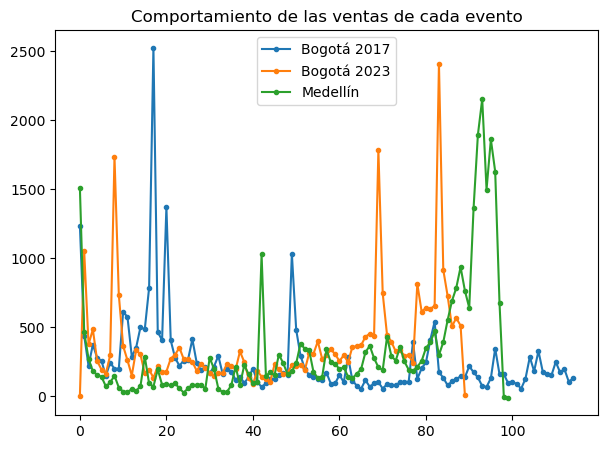

In [35]:
plt.subplots( figsize=(7, 5))
plt.plot(info_ventas_2017.index.astype("int64"),info_ventas_2017.Total_Boletas,marker='.')
plt.plot(info_ventas.index.astype("int64"),info_ventas.Total_Boletas,marker='.')
plt.plot(info_ventas2.index.astype("int64"),info_ventas2.Total_Boletas,marker='.')
#plt.plot(info_ventas3.index.astype("int64"),info_ventas3.Total_Boletas,marker='.')
#plt.plot(jj2.index.astype("int64"),jj2['val'],linestyle="--",marker='.',color="Red")
#plt.hlines(y=0,xmin=-40,xmax=45, linestyle="--",colors="Green")
#plt.axhline(y=0, color="#ff7f0e", linestyle="--")
plt.title("Comportamiento de las ventas de cada evento")
plt.legend(labels=["Bogotá 2017","Bogotá 2023","Medellín","Cali"])

In [36]:
#info_ventas = pd.DataFrame(data)

#info_ventas['DMY'] = pd.to_datetime(info_ventas['DMY'], format='%d/%m/%Y')
info_ventas['Fecha'] = pd.to_datetime(info_ventas['DMY'], format='%Y%m%d')

# Formatear la columna 'Fecha' al formato 'dd/mm/yyyy'
#info_ventas['Formatted_Fecha'] = info_ventas['DMY'].dt.strftime('%d/%m/%Y')

# Calcular la suma acumulada por día
info_ventas.sort_values(by='Fecha', inplace=True)
info_ventas['Suma_Acumulada'] = info_ventas['Total_Boletas'].cumsum()
#info_ventas.groupby('Fecha')['NET_SOLD_T_QTY'].cumsum()
info_ventas

,PRODUCT,DMY,Total_Boletas,Fecha,Suma_Acumulada
0,DISNEY ON ICE 100 AÑOS DE MAGIA,20230523,0,2023-05-23,0
1,DISNEY ON ICE 100 AÑOS DE MAGIA,20230524,1049,2023-05-24,1049
2,DISNEY ON ICE 100 AÑOS DE MAGIA,20230525,375,2023-05-25,1424
3,DISNEY ON ICE 100 AÑOS DE MAGIA,20230526,483,2023-05-26,1907
4,DISNEY ON ICE 100 AÑOS DE MAGIA,20230527,255,2023-05-27,2162
...,...,...,...,...,...
85,DISNEY ON ICE 100 AÑOS DE MAGIA,20230816,727,2023-08-16,32009
86,DISNEY ON ICE 100 AÑOS DE MAGIA,20230817,505,2023-08-17,32514
87,DISNEY ON ICE 100 AÑOS DE MAGIA,20230818,566,2023-08-18,33080
88,DISNEY ON ICE 100 AÑOS DE MAGIA,20230819,511,2023-08-19,33591


In [37]:
info_ventas2['Fecha'] = pd.to_datetime(info_ventas2['DMY'], format='%Y%m%d')
info_ventas2.sort_values(by='Fecha', inplace=True)
info_ventas2['Suma_Acumulada'] = info_ventas2['Total_Boletas'].cumsum()
info_ventas2

,PRODUCT,DMY,Total_Boletas,Fecha,Suma_Acumulada
0,disney on ice medellin,20190408,1511,2019-04-08,1511
1,disney on ice medellin,20190409,462,2019-04-09,1973
2,disney on ice medellin,20190410,272,2019-04-10,2245
3,disney on ice medellin,20190411,180,2019-04-11,2425
4,disney on ice medellin,20190412,154,2019-04-12,2579
...,...,...,...,...,...
95,disney on ice medellin,20190712,1860,2019-07-12,31050
96,disney on ice medellin,20190713,1627,2019-07-13,32677
97,disney on ice medellin,20190714,674,2019-07-14,33351
98,disney on ice medellin,20190715,-9,2019-07-15,33342


In [38]:
info_ventas3['Fecha'] = pd.to_datetime(info_ventas3['DMY'], format='%Y%m%d')
info_ventas3.sort_values(by='Fecha', inplace=True)
info_ventas3['Suma_Acumulada'] = info_ventas3['Total_Boletas'].cumsum()
info_ventas3

,PRODUCT,DMY,Total_Boletas,Fecha,Suma_Acumulada
0,disney on ice cali,20190408,842,2019-04-08,842
1,disney on ice cali,20190409,338,2019-04-09,1180
2,disney on ice cali,20190410,224,2019-04-10,1404
3,disney on ice cali,20190411,159,2019-04-11,1563
4,disney on ice cali,20190412,142,2019-04-12,1705
...,...,...,...,...,...
90,disney on ice cali,20190707,1446,2019-07-07,38207
91,disney on ice cali,20190708,-67,2019-07-08,38140
92,disney on ice cali,20190710,-4,2019-07-10,38136
93,disney on ice cali,20190827,-4,2019-08-27,38132


In [39]:
info_ventas_2017['Fecha'] = pd.to_datetime(info_ventas3['DMY'], format='%Y%m%d')
info_ventas_2017.sort_values(by='Fecha', inplace=True)
info_ventas_2017['Suma_Acumulada'] = info_ventas_2017['Total_Boletas'].cumsum()
info_ventas_2017

,PRODUCT,DMY,Total_Boletas,Fecha,Suma_Acumulada
0,DISNEY ON ICE,20170714,1236,2019-04-08,1236
1,DISNEY ON ICE,20170715,437,2019-04-09,1673
2,DISNEY ON ICE,20170716,220,2019-04-10,1893
3,DISNEY ON ICE,20170717,373,2019-04-11,2266
4,DISNEY ON ICE,20170718,277,2019-04-12,2543
...,...,...,...,...,...
110,DISNEY ON ICE,20171101,248,NaT,28200
111,DISNEY ON ICE,20171102,172,NaT,28372
112,DISNEY ON ICE,20171103,196,NaT,28568
113,DISNEY ON ICE,20171104,105,NaT,28673


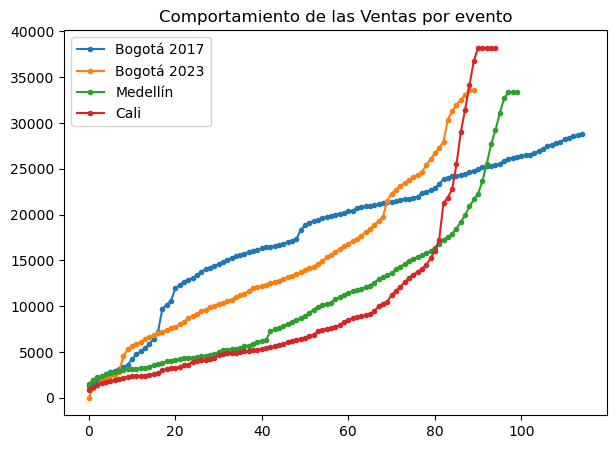

In [40]:
plt.subplots( figsize=(7, 5))
plt.plot(info_ventas_2017.index.astype("int64"),info_ventas_2017.Suma_Acumulada,marker='.')
plt.plot(info_ventas.index.astype("int64"),info_ventas.Suma_Acumulada,marker='.')
plt.plot(info_ventas2.index.astype("int64"),info_ventas2.Suma_Acumulada,marker='.')
plt.plot(info_ventas3.index.astype("int64"),info_ventas3.Suma_Acumulada,marker='.')
#plt.plot(jj2.index.astype("int64"),jj2['val'],linestyle="--",marker='.',color="Red")
#plt.hlines(y=0,xmin=-40,xmax=45, linestyle="--",colors="Green")
#plt.axhline(y=0, color="#ff7f0e", linestyle="--")
plt.title("Comportamiento de las Ventas por evento")
plt.legend(labels=["Bogotá 2017","Bogotá 2023","Medellín","Cali"])

In [ ]:
df_mod.GENDER.unique()                    

In [41]:
def convert_gender(df):
    gender = df['GENDER']
    address_salutation = df['ADDRESS_SALUTATION']
    if gender == 'MALE':
        return 'HOMBRE'
    elif gender == 'FEMALE':
        return 'MUJER'
    elif gender == 'UNKNOWN' and address_salutation in ('Mr', 'Señor', 'Señor,', 'Don'):
        return 'HOMBRE'
    elif gender == 'UNKNOWN' and address_salutation in ('Ms','Mrs', 'Miss', 'Señora', 'Señorita'):
        return 'MUJER'
    elif gender == '' and address_salutation in ('Mr', 'Señor', 'Señor,', 'Don'):
        return 'HOMBRE'
    elif gender == '' and address_salutation in ('Ms','Mrs', 'Miss', 'Señora', 'Señorita'):
        return 'MUJER'
    elif (gender is None or gender == '') and address_salutation in ('Mr', 'Señor', 'Señor,', 'Don'):
        return 'HOMBRE'
    elif (gender is None or gender == '') and address_salutation in ('Ms','Mrs', 'Miss', 'Señora', 'Señorita'):
        return 'MUJER'
    elif gender is None and address_salutation in ('Mr', 'Señor', 'Señor,', 'Don'):
        return 'HOMBRE'
    elif gender is None and address_salutation in ('Ms','Mrs', 'Miss', 'Señora', 'Señorita'):
        return 'MUJER'
    else:
        return 'SIN DATO'

# Ejemplo de uso:
df_mod['Gender_Ajustado'] = df_mod.apply(convert_gender, axis=1)


In [42]:
info_ventas=df_mod[df_mod.PRODUCT.str.contains('100')].groupby(['PRODUCT','DMY']).agg({'Total_Boletas':'sum'}).reset_index()
#info_ventas.set_index('DMY', inplace=True)
info_ventas

,PRODUCT,DMY,Total_Boletas
0,disney on ice 100 años de magia,20230523,0
1,disney on ice 100 años de magia,20230524,1049
2,disney on ice 100 años de magia,20230525,375
3,disney on ice 100 años de magia,20230526,483
4,disney on ice 100 años de magia,20230527,255
...,...,...,...
68,disney on ice 100 años de magia,20230730,437
69,disney on ice 100 años de magia,20230731,1781
70,disney on ice 100 años de magia,20230801,744
71,disney on ice 100 años de magia,20230802,443


ValueError: cannot convert float NaN to integer

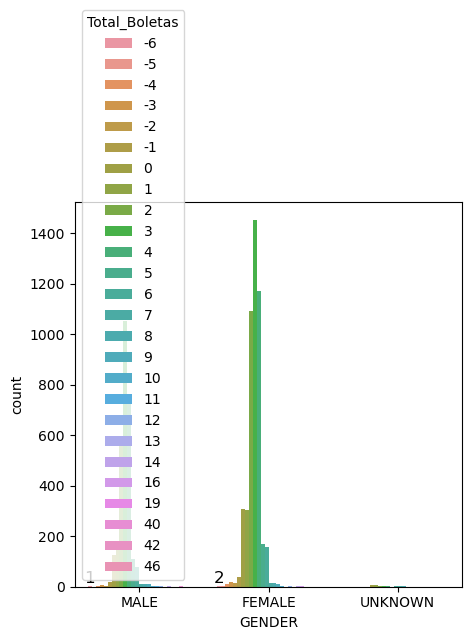

In [43]:
plt.figure(figsize=(5, 5))
filtered_df = df_mod[df_mod['PRODUCT'].str.contains('100', na=False)]
ax=sns.countplot(x='GENDER', hue='Total_Boletas', data=filtered_df)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, color='black', ha='center', va='bottom')

plt.show()
plt.show()

In [44]:
info_ventas_g=df_mod[df_mod.PRODUCT.isin(['disney on ice cali','disney on ice medellin','disney on ice 100 años de magia'])].groupby(['PRODUCT','Gender_Ajustado']).agg({'Total_Boletas':'sum'}).reset_index()
total_ventas = info_ventas_g.groupby('PRODUCT')['Total_Boletas'].transform('sum')

# Calcular el porcentaje de ventas por producto y género
info_ventas_g['Porcentaje'] = (info_ventas_g['Total_Boletas'] / total_ventas) * 100

# Redondear los valores de porcentaje a 2 decimales
info_ventas_g['Porcentaje'] = info_ventas_g['Porcentaje'].round(2)
info_ventas_g

,PRODUCT,Gender_Ajustado,Total_Boletas,Porcentaje
0,disney on ice 100 años de magia,HOMBRE,8706,38.09
1,disney on ice 100 años de magia,MUJER,13549,59.27
2,disney on ice 100 años de magia,SIN DATO,604,2.64
3,disney on ice cali,HOMBRE,13335,34.97
4,disney on ice cali,MUJER,21517,56.43
5,disney on ice cali,SIN DATO,3277,8.59
6,disney on ice medellin,HOMBRE,11963,35.89
7,disney on ice medellin,MUJER,17895,53.69
8,disney on ice medellin,SIN DATO,3472,10.42


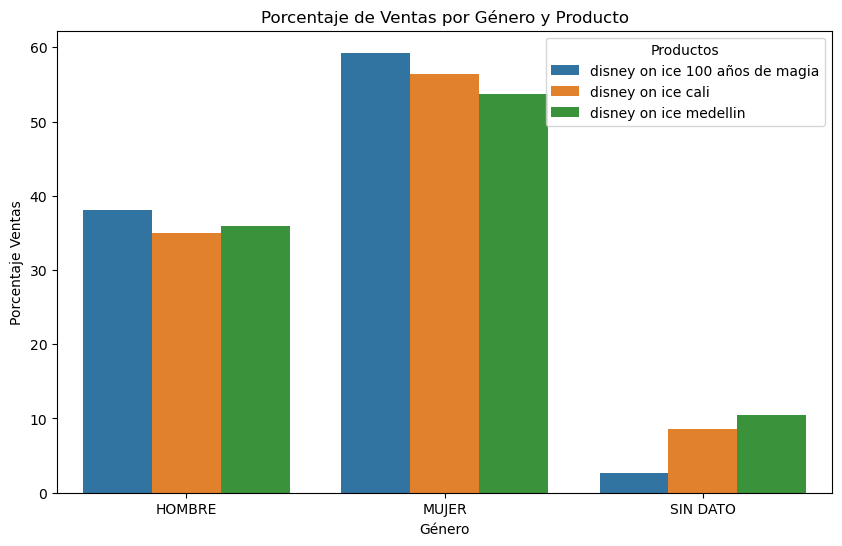

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender_Ajustado', y='Porcentaje', hue='PRODUCT', data=info_ventas_g)

# Configurar etiquetas y título
plt.xlabel('Género')
plt.ylabel('Porcentaje Ventas')
plt.title('Porcentaje de Ventas por Género y Producto')
plt.legend(title='Productos')

# Mostrar el gráfico
plt.show()

In [46]:
from datetime import datetime

fecha_actual = datetime.now()

# Reemplazar valores nulos con la categoría "Sin Datos"
df_mod['BIRTHDATE'].fillna('Sin Datos', inplace=True)

# Convertir la columna a tipo string
df_mod['BIRTHDATE'] = df_mod['BIRTHDATE'].astype(str)

# Aplicar datetime.strptime() a las fechas no nulas
df_mod['fecha_nacimiento'] = df_mod['BIRTHDATE'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S") if x != 'Sin Datos' else None)

# Calcular la edad solo para fechas no nulas
df_mod['EDAD'] = fecha_actual.year - df_mod['fecha_nacimiento'].dt.year - ((fecha_actual.month < df_mod['fecha_nacimiento'].dt.month) | ((fecha_actual.month == df_mod['fecha_nacimiento'].dt.month) & (fecha_actual.day < df_mod['fecha_nacimiento'].dt.day)))


In [47]:
df_mod[df_mod['EDAD'] <= 13]

,T_PRODUCT_ID,PRODUCT,PRODUCT_CODE,ORGANIZATION,INVOICE_CONTACT_FMT_NAME,TOPIC,SUB_TOPIC,PRODUCT_DATE_TIME,ORDER_DATE_TIME,SALES_CHANNEL_TYPE,...,NEW_MAIN_ADDR_GEO_ZONE,NEW_MAIN_ADDR_COUNTRY,TARIFA_AGRUPADA,Nuevo,Fecha,DMY,Total_Boletas,Gender_Ajustado,fecha_nacimiento,EDAD
35,101329485635,disney on ice cali,ODOI19CL,Tuboleta.com,OCESA COLOMBIA SAS. ( 4 ),Familia,Infantil,03/07/2019 19:00:00,12/04/2019 12:19:18,Taquillas,...,Antioquia,Colombia,Precio Full,NaN,2019-04-12 12:19:18,20190412,-1,HOMBRE,2019-02-01 00:00:00,4.0
36,101328941951,disney on ice medellin,ADOIME19,Tuboleta.com,OCESA COLOMBIA SAS. ( 4 ),Familia,Infantil,10/07/2019 19:00:00,21/05/2019 19:28:27,Taquillas,...,Antioquia,Colombia,Precio Full,NaN,2019-05-21 19:28:27,20190521,-1,HOMBRE,2019-02-01 00:00:00,4.0
37,101328941951,disney on ice medellin,ADOIME19,Tuboleta.com,OCESA COLOMBIA SAS. ( 4 ),Familia,Infantil,11/07/2019 19:00:00,06/05/2019 17:38:12,Taquillas,...,Antioquia,Colombia,Precio Full,NaN,2019-05-06 17:38:12,20190506,1,HOMBRE,2019-02-01 00:00:00,4.0
38,101328941951,disney on ice medellin,ADOIME19,Tuboleta.com,OCESA COLOMBIA SAS. ( 4 ),Familia,Infantil,12/07/2019 15:00:00,17/05/2019 11:20:49,Taquillas,...,Antioquia,Colombia,Precio Full,NaN,2019-05-17 11:20:49,20190517,1,HOMBRE,2019-02-01 00:00:00,4.0
39,101328941951,disney on ice medellin,ADOIME19,Tuboleta.com,OCESA COLOMBIA SAS. ( 4 ),Familia,Infantil,10/07/2019 19:00:00,21/05/2019 14:10:07,Taquillas,...,Antioquia,Colombia,Precio Full,NaN,2019-05-21 14:10:07,20190521,1,HOMBRE,2019-02-01 00:00:00,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352215,10228344649616,misión quynza: de camino a la luna vie-dom,MQCALVD,Idartes,IDARTES - PLANETARIO ( 265594 ),Familia,Familia,05/09/2021 13:00:00,05/09/2021 11:17:41,Taquillas,...,NaN,NaN,Precio Full,NaN,2021-09-05 11:17:41,20210905,2,SIN DATO,2023-07-14 21:01:54,0.0
352438,101403265431,show láser bandas musicales: michael jackson,BGMICHA,Idartes,IDARTES - PLANETARIO ( 265594 ),Familia,Familia,15/02/2020 19:00:00,13/02/2020 21:14:42,Internet gran público,...,NaN,NaN,Precio Full,NaN,2020-02-13 21:14:42,20200213,2,HOMBRE,2023-08-03 16:51:35,0.0
352439,101360843306,festival brilla colombia 2019,BBRILLAC,Tuboleta.com,DPL ENTERTECH ( 225459 ),Familia,Infantil,NaN,20/12/2019 08:28:58,Internet gran público,...,NaN,NaN,Precio Full,NaN,2019-12-20 08:28:58,20191220,2,HOMBRE,2023-08-03 16:51:35,0.0
353219,10229196706821,disney on ice 100 años de magia,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,05/09/2023 19:00:00,21/07/2023 08:56:15,Internet gran público,...,Bogotá D.C.,Colombia,Preventa,Etapas de venta,2023-07-21 08:56:15,20230721,6,HOMBRE,2019-09-22 00:00:00,3.0


In [48]:
min(df_mod['BIRTHDATE'])

'01/01/1919 00:00:00'

In [49]:
max(df_mod['BIRTHDATE'])

'Sin Datos'

In [50]:
np.sort(df_mod['BIRTHDATE'].unique())

array(['01/01/1919 00:00:00', '01/01/1922 00:00:00',
       '01/01/1941 00:00:00', ..., '12/31/2004 00:00:00',
       '12/31/2021 00:00:00', 'Sin Datos'], dtype=object)

In [51]:
def convert_Edad(Edad):
    if Edad <=18 :
        return 'A.Menores de 18'
    elif Edad <=24 :
        return 'B.18 a 24'
    elif Edad <=34 :
        return 'C.25 a 34'
    elif Edad <=44 :
        return 'D.35 a 44'
    elif Edad <=54 :
        return 'E.45 a 54'
    elif Edad <=64 :
        return 'F.55 a 64'
    elif Edad >64 :
        return 'G.Mayores a 64'
    else:
        return 'SIN DATO'
df_mod['Rango_Edad'] = df_mod['EDAD'].apply(convert_Edad)

In [52]:
info_ventas_e=df_mod[df_mod.PRODUCT.isin(['disney on ice cali','disney on ice medellin','disney on ice 100 años de magia'])].groupby(['PRODUCT','Rango_Edad']).agg({'Total_Boletas':'sum'}).reset_index()
total_ventas = info_ventas_e.groupby('PRODUCT')['Total_Boletas'].transform('sum')

# Calcular el porcentaje de ventas por producto y género
info_ventas_e['Porcentaje'] = (info_ventas_e['Total_Boletas'] / total_ventas) * 100
# Redondear los valores de porcentaje a 2 decimales
info_ventas_e['Porcentaje'] = info_ventas_e['Porcentaje'].round(2)
info_ventas_e

,PRODUCT,Rango_Edad,Total_Boletas,Porcentaje
0,disney on ice 100 años de magia,A.Menores de 18,140,0.61
1,disney on ice 100 años de magia,B.18 a 24,773,3.38
2,disney on ice 100 años de magia,C.25 a 34,5435,23.78
3,disney on ice 100 años de magia,D.35 a 44,11826,51.73
4,disney on ice 100 años de magia,E.45 a 54,2907,12.72
5,disney on ice 100 años de magia,F.55 a 64,809,3.54
6,disney on ice 100 años de magia,G.Mayores a 64,269,1.18
7,disney on ice 100 años de magia,SIN DATO,700,3.06
8,disney on ice cali,A.Menores de 18,3009,7.89
9,disney on ice cali,B.18 a 24,73,0.19


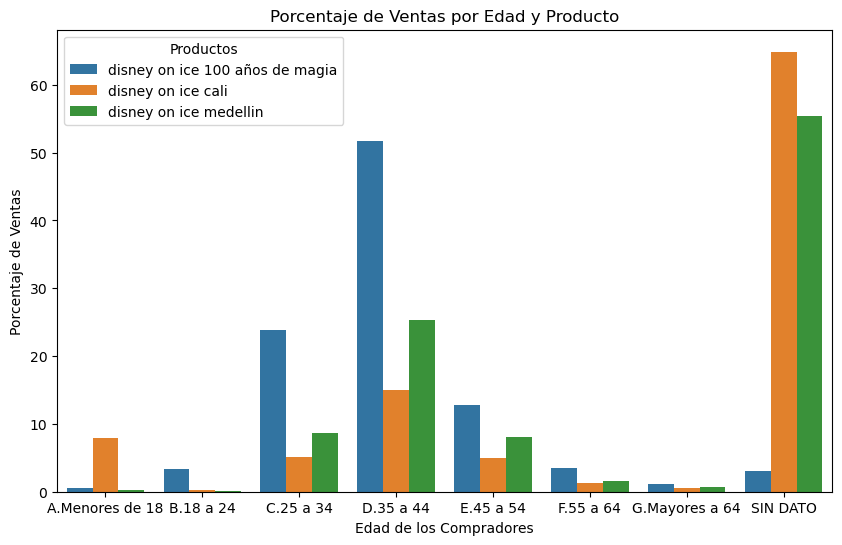

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Rango_Edad', y='Porcentaje', hue='PRODUCT', data=info_ventas_e)

# Configurar etiquetas y título
plt.xlabel('Edad de los Compradores')
plt.ylabel('Porcentaje de Ventas')
plt.title('Porcentaje de Ventas por Edad y Producto')
plt.legend(title='Productos')

# Mostrar el gráfico
plt.show()

In [54]:
info_ventas_e_=df_mod[df_mod.PRODUCT.isin(['disney on ice 100 años de magia'])].groupby(['PRODUCT','Rango_Edad']).agg({'Total_Boletas':'mean'}).reset_index()
#total_ventas = info_ventas_e.groupby('PRODUCT')['Total_Boletas'].transform('sum')

# Calcular el porcentaje de ventas por producto y género
#info_ventas_e['Porcentaje'] = (info_ventas_e['Total_Boletas'] / total_ventas) * 100
# Redondear los valores de porcentaje a 2 decimales
#info_ventas_e['Porcentaje'] = info_ventas_e['Porcentaje'].round(2)
info_ventas_e_

,PRODUCT,Rango_Edad,Total_Boletas
0,disney on ice 100 años de magia,A.Menores de 18,2.692308
1,disney on ice 100 años de magia,B.18 a 24,2.684028
2,disney on ice 100 años de magia,C.25 a 34,2.685277
3,disney on ice 100 años de magia,D.35 a 44,3.014530
4,disney on ice 100 años de magia,E.45 a 54,2.864039
5,disney on ice 100 años de magia,F.55 a 64,2.985240
6,disney on ice 100 años de magia,G.Mayores a 64,3.091954
7,disney on ice 100 años de magia,SIN DATO,2.904564


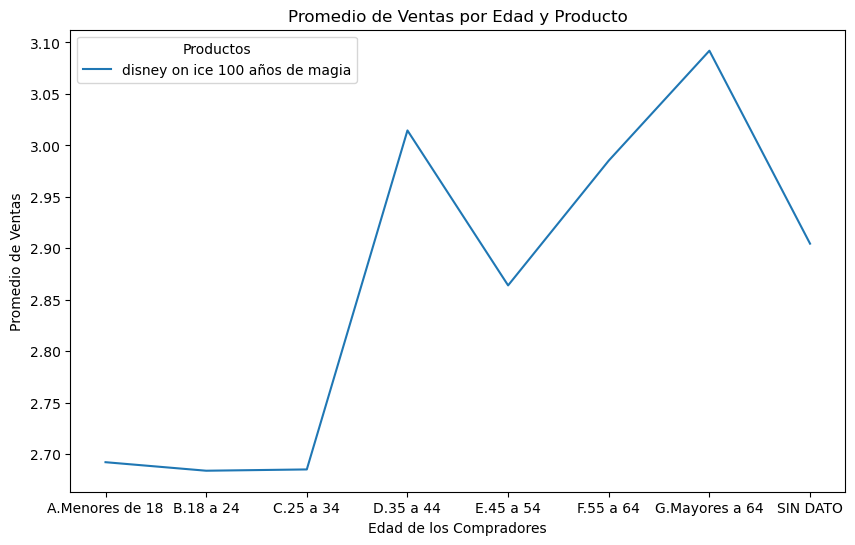

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Rango_Edad', y='Total_Boletas', hue='PRODUCT', data=info_ventas_e_)

# Configurar etiquetas y título
plt.xlabel('Edad de los Compradores')
plt.ylabel('Promedio de Ventas')
plt.title('Promedio de Ventas por Edad y Producto')
plt.legend(title='Productos')

# Mostrar el gráfico
plt.show()

In [ ]:
df_mod['EMAIL'].head(10)

In [56]:
df_mod['Organismo_EMAIL'] = df_mod['EMAIL'].apply(lambda x: x.split('@')[1].lower() if isinstance(x, str) and '@' in x else None)

In [57]:
info_ventas_correo=df_mod[df_mod.PRODUCT.isin(['disney on ice cali','disney on ice medellin','disney on ice 100 años de magia'])].groupby(['PRODUCT','Organismo_EMAIL']).agg({'Total_Boletas':'sum'}).reset_index().sort_values(by='Total_Boletas', ascending=False)
info_ventas_correo

,PRODUCT,Organismo_EMAIL,Total_Boletas
78,disney on ice 100 años de magia,gmail.com,12241
633,disney on ice medellin,gmail.com,11952
349,disney on ice cali,hotmail.com,11734
666,disney on ice medellin,hotmail.com,10859
326,disney on ice cali,gmail.com,8778
...,...,...,...
167,disney on ice 100 años de magia,tuboleta.com,0
162,disney on ice 100 años de magia,tbl.com,0
158,disney on ice 100 años de magia,systemasnet.com,0
184,disney on ice 100 años de magia,utadeo.edu.co,0


In [ ]:
#lista_correos=df_mod['Organismo_EMAIL'].value_counts()
#pd.DataFrame(info_ventas_correo).to_csv('lista_correos_2.csv')

In [58]:
info_ventas_e=df_mod[df_mod.PRODUCT.isin(['disney on ice 100 años de magia'])].groupby(['PRODUCT','Organismo_EMAIL']).agg({'Total_Boletas':'sum'}).reset_index().sort_values(by='Total_Boletas', ascending=False)
info_ventas_e

,PRODUCT,Organismo_EMAIL,Total_Boletas
78,disney on ice 100 años de magia,gmail.com,12241
85,disney on ice 100 años de magia,hotmail.com,7545
192,disney on ice 100 años de magia,yahoo.com,904
198,disney on ice 100 años de magia,yahoo.es,370
125,disney on ice 100 años de magia,outlook.com,278
...,...,...,...
162,disney on ice 100 años de magia,tbl.com,0
153,disney on ice 100 años de magia,studiomedia.co,0
167,disney on ice 100 años de magia,tuboleta.com,0
184,disney on ice 100 años de magia,utadeo.edu.co,0


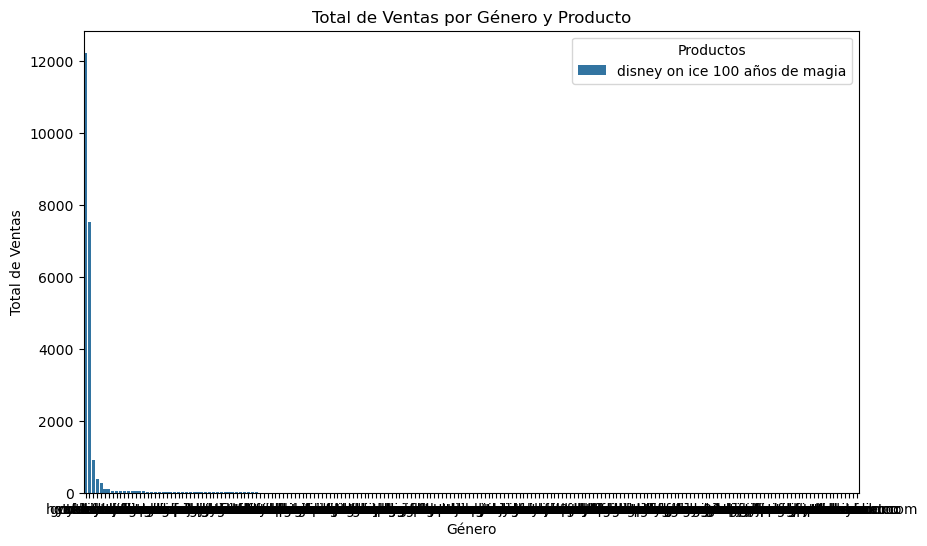

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Organismo_EMAIL', y='Total_Boletas', hue='PRODUCT', data=info_ventas_e)

# Configurar etiquetas y título
plt.xlabel('Género')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Género y Producto')
plt.legend(title='Productos')

# Mostrar el gráfico
plt.show()

In [60]:
df_mod['SALES_CHANNEL_TYPE'].value_counts()

Internet gran público                 180685
Taquillas                             168425
Plataforma telefònica                   4143
Internet agencia                          11
Plataforma de reventa por internet         2
Name: SALES_CHANNEL_TYPE, dtype: int64

In [61]:
info_ventas_canal=df_mod[df_mod.PRODUCT.isin(['disney on ice cali','disney on ice medellin','disney on ice 100 años de magia'])].groupby(['PRODUCT','SALES_CHANNEL_TYPE']).agg({'Total_Boletas':'sum'}).reset_index()
info_ventas_canal
total_ventas = info_ventas_canal.groupby('PRODUCT')['Total_Boletas'].transform('sum')

# Calcular el porcentaje de ventas por producto y género
info_ventas_canal['Porcentaje'] = (info_ventas_canal['Total_Boletas'] / total_ventas) * 100
# Redondear los valores de porcentaje a 2 decimales
info_ventas_canal['Porcentaje'] = info_ventas_canal['Porcentaje'].round(2)

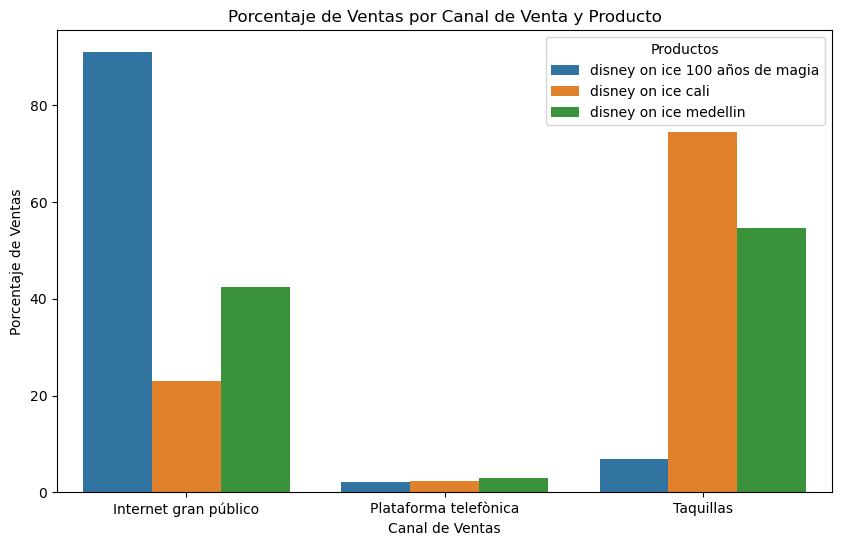

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='SALES_CHANNEL_TYPE', y='Porcentaje', hue='PRODUCT', data=info_ventas_canal)

# Configurar etiquetas y título
plt.xlabel('Canal de Ventas')
plt.ylabel('Porcentaje de Ventas')
plt.title('Porcentaje de Ventas por Canal de Venta y Producto')
plt.legend(title='Productos')

# Mostrar el gráfico
plt.show()

In [63]:
df_mod['SSO_PROVIDER'].fillna('Sin Datos', inplace=True)
info_ventas_a=df_mod[df_mod.PRODUCT.isin(['disney on ice cali','disney on ice medellin','disney on ice 100 años de magia'])].groupby(['PRODUCT','SSO_PROVIDER']).agg({'Total_Boletas':'sum'}).reset_index()
total_ventas = info_ventas_a.groupby('PRODUCT')['Total_Boletas'].transform('sum')

# Calcular el porcentaje de ventas por producto y género
info_ventas_a['Porcentaje'] = (info_ventas_a['Total_Boletas'] / total_ventas) * 100
# Redondear los valores de porcentaje a 2 decimales
info_ventas_a['Porcentaje'] = info_ventas_a['Porcentaje'].round(2)
info_ventas_a



,PRODUCT,SSO_PROVIDER,Total_Boletas,Porcentaje
0,disney on ice 100 años de magia,FACEBOOK,1138,4.98
1,disney on ice 100 años de magia,GOOGLE,3989,17.45
2,disney on ice 100 años de magia,Sin Datos,17713,77.49
3,disney on ice 100 años de magia,TWITTER,19,0.08
4,disney on ice cali,FACEBOOK,2675,7.02
5,disney on ice cali,GOOGLE,2856,7.49
6,disney on ice cali,Sin Datos,32554,85.38
7,disney on ice cali,TWITTER,44,0.12
8,disney on ice medellin,FACEBOOK,3385,10.16
9,disney on ice medellin,GOOGLE,4403,13.21


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='SSO_PROVIDER', y='Porcentaje', hue='PRODUCT', data=info_ventas_a)
# Configurar etiquetas y título
plt.xlabel('Autenticación')
plt.ylabel('Porcentaje de Ventas')
plt.title('Porcentaje Autenticación y Producto')
plt.legend(title='Productos')
# Mostrar el gráfico
plt.show()


In [ ]:
LOGICAL_SEAT_CATEGORY
DN_QUOTA


In [ ]:
#df_mod['UNIT_AMT_ITX'] = df_mod['UNIT_AMT_ITX'].str.replace(',', '.')
df_mod['UNIT_AMT_ITX']  = pd.to_numeric(df_mod['UNIT_AMT_ITX'] , errors='coerce')
#df_mod['UNIT_AMT_ITX'] = df_mod['UNIT_AMT_ITX'].astype(float)
df_mod['Total_Boletas']=df_mod['NET_SOLD_T_QTY']-df_mod['NET_SOLD_C_QTY']

df_mod['PROMOTOR'] = df_mod['INVOICE_CONTACT_FMT_NAME'].apply(lambda x: x.split('(')[1].lower() if isinstance(x, str) and '(' in x else None)

#pd.to_datetime(date_string, format='%d/%m/%Y %H:%M:%S')
#df_mod['Fecha_evento'] = df_mod['PRODUCT_DATE_TIME'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M:%S") if x != 'Sin Datos' else None)
#df_mod['Fecha_compra'] = df_mod['ORDER_DATE_TIME'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S") if x != 'Sin Datos' else None)
df_mod['Fecha_evento']=pd.to_datetime(df_mod['PRODUCT_DATE_TIME'], format='%d/%m/%Y %H:%M:%S')
df_mod['Fecha_compra'] =pd.to_datetime(df_mod['ORDER_DATE_TIME'], format='%d/%m/%Y %H:%M:%S')
df_mod['DAYS_BEFORE_EVENT']=(df_mod['Fecha_evento'] - df_mod['Fecha_compra']).dt.days
df_mod

In [ ]:
Tipo_variables=df_mod[['PRODUCT', 'INVOICE_CONTACT_FMT_NAME','ORGANIZATION','PROMOTOR', 'TOPIC', 'SUB_TOPIC', 'VENUE', 'CIUDAD',
                       'UNIT_AMT_ITX','PERFORMANCE_QUOTA','DN_QUOTA','DAYS_BEFORE_EVENT']]
Tipo_variables.info()

In [ ]:
Tipo_variables

In [ ]:
result = df_mod.groupby(['PRODUCT', 'PROMOTOR','INVOICE_CONTACT_FMT_NAME', 'TOPIC', 'SUB_TOPIC', 'VENUE', 'CIUDAD']).agg({
        'UNIT_AMT_ITX': ['min', 'max','mean'],
        'PERFORMANCE_QUOTA': ['min', 'max','mean'],
#        'DN_QUOTA': 'max',
        'DAYS_BEFORE_EVENT': 'max',
        'Total_Boletas':'sum',
        'PRODUCT_DATE_TIME': ['nunique','max'],        
        'SEAT_CATEGORY' : 'nunique'
    }).reset_index()
result.columns = ['PRODUCT','PROMOTOR', 'INVOICE_CONTACT_FMT_NAME', 'TOPIC', 'SUB_TOPIC', 'VENUE', 'CIUDAD', 
                  'MIN_UNIT_AMT_ITX','MAX_UNIT_AMT_ITX','AVG_UNIT_AMT_ITX', 
                  'MIN_PERFORMANCE_QUOTA','MAX_PERFORMANCE_QUOTA', 'AVG_PERFORMANCE_QUOTA',
                  'DAYS_BEFORE_EVENT','BOLETAS_VENDIDAS','COUNT_PRODUCT_DATE_TIME','FECHA_EVENTO','COUNT_SEAT_CATEGORY']
result

In [ ]:
result['Porc_ventas']=result['BOLETAS_VENDIDAS']/result['MAX_PERFORMANCE_QUOTA']
result
result['Comporamiento_evento']=result['Porc_ventas'].apply(lambda x: 'Exitoso' if x>0.75 else ('Equilibrio' if x >= 0.65 else 'Fracaso'))
result

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Cargar tus datos en un DataFrame
# data = {
#     'Edad': [25, 30, 35, 22, 40, 28, 20, 32],
#     'Genero': ['M', 'F', 'F', 'M', 'F', 'M', 'M', 'F'],
#     'Ingresos': [50000, 60000, 75000, 40000, 80000, 55000, 35000, 70000],
#     'Compra': ['No', 'Si', 'Si', 'No', 'Si', 'No', 'No', 'Si']
# }
df = result.dropna()

# Dividir los datos en características (X) y etiquetas (y)
X = df.drop(['PRODUCT','Comporamiento_evento','PROMOTOR','Porc_ventas','INVOICE_CONTACT_FMT_NAME'], axis=1)
y = df['Comporamiento_evento']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

# Definir las columnas categóricas y numéricas
categorical_cols = [ 'TOPIC', 'SUB_TOPIC', 'VENUE', 'CIUDAD']
numeric_cols = ['MIN_UNIT_AMT_ITX', 'MAX_UNIT_AMT_ITX', 'MAX_PERFORMANCE_QUOTA', 'COUNT_PRODUCT_DATE_TIME']

# Crear transformadores para escalamiento y codificación
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Crear preprocesador que aplique transformaciones a columnas específicas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocesar los datos
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed
# # Crear y entrenar el modelo k-NN
# knn_model = KNeighborsClassifier(n_neighbors=3)
# knn_model.fit(X_train_preprocessed, y_train)

# # Realizar predicciones en el conjunto de prueba
# y_pred = knn_model.predict(X_test_preprocessed)

# # Calcular la precisión del modelo
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Precisión del modelo: {accuracy:.2f}')

In [ ]:
print(X_train_preprocessed)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Utilizar TruncatedSVD para reducir la dimensionalidad a 2 componentes
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train_preprocessed)
X_test_svd = svd.transform(X_test_preprocessed)

# Crear y entrenar el modelo k-NN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_svd, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test_svd)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')
class_to_color = {'Fracaso': 'red', 'Exitoso': 'blue','Equilibrio': 'green'} 
colors = [class_to_color[label] for label in y_pred]

# Graficar los resultados en un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X_test_svd[:, 0], X_test_svd[:, 1], c=colors, cmap='coolwarm', marker='o')
plt.title('Resultados de Clasificación del Modelo KNN (TruncatedSVD)')
plt.xlabel('Componente 1 (SVD)')
plt.ylabel('Componente 2 (SVD)')
plt.show()

In [ ]:
info_ventas_2017

In [ ]:
info_ventas_pronostico=Base_DOI[Base_DOI.PRODUCT.str.contains('100')].groupby(['PRODUCT','DMY']).agg(
    {'Total_Boletas':'sum',
     'UNIT_AMT_ITX': ['min', 'max','mean'],
     'PROMOTION':'nunique'
    }
).reset_index()
info_ventas_pronostico.columns = ['PRODUCT','DMY', 'BOLETAS_VENDIDAS',
                  'MIN_UNIT_AMT_ITX','MAX_UNIT_AMT_ITX','AVG_UNIT_AMT_ITX', 
                  'COUNT_PROMOTION']
info_ventas_pronostico

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

# Cargar los datos de consumo de electricidad
data = info_ventas_pronostico[['DMY','BOLETAS_VENDIDAS','MIN_UNIT_AMT_ITX','MAX_UNIT_AMT_ITX','AVG_UNIT_AMT_ITX','COUNT_PROMOTION']]
data['DMY'] = pd.to_datetime(data['DMY'])
data.set_index('DMY', inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(0.8 * len(data))
train_data, test_data = data[:train_size], data[train_size:]

# Verificar la estacionariedad de las series temporales
def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Entrenar el modelo VAR
model = VAR(train_data)
model_fit = model.fit()

# Realizar pronósticos en el conjunto de prueba
lag_order = model_fit.k_ar
forecast = model_fit.forecast(test_data.values, steps=len(test_data))

# Calcular el error RMSE
##rmse = sqrt(mean_squared_error(test_data, forecast, multioutput='raw_values'))
#print(f'RMSE: {rmse}')

# Visualizar los pronósticos y los datos reales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['BOLETAS_VENDIDAS'], label='Real')
plt.plot(test_data.index, forecast[:, 0], label='Forecast', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('BOLETAS_VENDIDAS')
plt.title('BOLETAS_VENDIDAS Forecast')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Cargar los datos de la serie de tiempo

data = info_ventas_pronostico[['DMY','BOLETAS_VENDIDAS']]
data['DMY'] = pd.to_datetime(data['DMY'])
data.set_index('DMY', inplace=True)

# Visualizar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie de Tiempo')
plt.show()

In [ ]:
# Verificar la estacionariedad de la serie de tiempo
result = adfuller(data['BOLETAS_VENDIDAS'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Diferenciar la serie de tiempo si es necesario para hacerla estacionaria
data_diff = data.diff().dropna()

# Visualizar la serie de tiempo diferenciada
plt.figure(figsize=(10, 6))
plt.plot(data_diff)
plt.xlabel('Fecha')
plt.ylabel('Valor Diferenciado')
plt.title('Serie de Tiempo Diferenciada')
plt.show()



In [ ]:
# Identificar los parámetros p, d y q utilizando ACF y PACF
plot_acf(data_diff)
plot_pacf(data_diff)
plt.show()

In [ ]:
# Crear y entrenar el modelo SARIMA
p, d, q = 1, 1, 1  # Ajustar estos valores según los resultados de ACF y PACF
P, D, Q, s = 1, 1, 1, 30  # Parámetros estacionales
sarima_model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()

# Realizar pronósticos en el futuro
forecast_steps = 25  # Número de pasos en el futuro para pronosticar
forecast = sarima_fit.get_forecast(steps=forecast_steps)

# Visualizar los pronósticos y el intervalo de confianza
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')
plt.figure(figsize=(10, 6))
plt.plot(data, label='Observado')
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Pronóstico')
#plt.fill_between(forecast_index, forecast.conf_int()[:, 0], forecast.conf_int()[:, 1], color='pink')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Pronóstico con Modelo SARIMA')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Cargar los datos de la serie de tiempo
data_serie = info_ventas_pronostico[['DMY','BOLETAS_VENDIDAS']]
data_serie['DMY'] = pd.to_datetime(data_serie['DMY'])
data_serie.set_index('DMY', inplace=True)

#data_serie = pd.read_csv('time_series_data.csv', parse_dates=['Date'], index_col='Date')

# Elaborar el modelo de red neuronal
neural_network = SARIMAX(data_serie)

# Ajustar el modelo
neural_network_fit = neural_network.fit()

# Elaborar el pronóstico
forecast_steps = 24  # Número de pasos en el futuro para pronosticar
forecast = neural_network_fit.get_forecast(steps=forecast_steps)

# Graficar el pronóstico
plt.figure(figsize=(10, 6))
plt.plot(data_serie, label='Observado')
plt.plot(forecast.predicted_mean, color='red', label='Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Pronóstico con Red Neuronal')
plt.legend()
plt.show()


In [64]:
info_ventas_harry=df_mod[df_mod.PRODUCT.str.contains('azkaban')].groupby(['PRODUCT','DMY','SEAT_CATEGORY']).agg({'Total_Boletas':'sum'}).sort_values(by=['SEAT_CATEGORY','DMY']).reset_index()
info_ventas_harry['idx'] = info_ventas_harry.groupby('SEAT_CATEGORY').cumcount()
info_ventas_fait=df_mod[df_mod.PRODUCT.str.contains('fait')].groupby(['PRODUCT','DMY','SEAT_CATEGORY']).agg({'Total_Boletas':'sum'}).sort_values(by=['SEAT_CATEGORY','DMY']).reset_index()
info_ventas_fait['idx'] = info_ventas_fait.groupby('SEAT_CATEGORY').cumcount()
info_ventas_DOI_med=df_mod[df_mod.PRODUCT.str.contains('ice medellin')].groupby(['PRODUCT','DMY','SEAT_CATEGORY']).agg({'Total_Boletas':'sum'}).sort_values(by=['SEAT_CATEGORY','DMY']).reset_index()
info_ventas_DOI_med['idx'] = info_ventas_DOI_med.groupby('SEAT_CATEGORY').cumcount()
info_ventas_DOI_Cal=df_mod[df_mod.PRODUCT.str.contains('ice cali')].groupby(['PRODUCT','DMY','SEAT_CATEGORY']).agg({'Total_Boletas':'sum'}).sort_values(by=['SEAT_CATEGORY','DMY']).reset_index()
info_ventas_DOI_Cal['idx'] = info_ventas_DOI_Cal.groupby('SEAT_CATEGORY').cumcount()
info_ventas_DOI_2017=Base_Softix[Base_Softix.SITE.str.contains('CARPA SALITRE MAGICO')].groupby(['PRODUCT','DMY','SEAT_CATEGORY']).agg({'Total_Boletas':'sum'}).sort_values(by=['SEAT_CATEGORY','DMY']).reset_index()
info_ventas_DOI_2017['idx'] = info_ventas_DOI_2017.groupby('SEAT_CATEGORY').cumcount()
info_ventas_be=df_mod[df_mod.PRODUCT.str.contains('un bosque encantado')].groupby(['PRODUCT','DMY','SEAT_CATEGORY']).agg({'Total_Boletas':'sum'}).sort_values(by=['SEAT_CATEGORY','DMY']).reset_index()
info_ventas_be['idx'] = info_ventas_be.groupby('SEAT_CATEGORY').cumcount()


In [ ]:
info_ventas_DOI_2017

In [ ]:
df_mod.head()

# Nuevo Modelo

In [65]:
Base_DOI['Total_Boletas']=Base_DOI['NET_SOLD_T_QTY']-Base_DOI['NET_SOLD_C_QTY']
Base_DOI['Fecha'] = pd.to_datetime(Base_DOI['ORDER_DATE_TIME'], format='%d/%m/%Y %H:%M:%S')

Base_DOI['DMY'] = Base_DOI['Fecha'].dt.year.astype(str) + \
    (Base_DOI['Fecha'].dt.month.apply(lambda x: '0' + str(x) if x < 10 else str(x))) + \
    (Base_DOI['Fecha'].dt.day.apply(lambda x: '0' + str(x) if x < 10 else str(x)))
Base_DOI['Fecha_evento']=pd.to_datetime(Base_DOI['PRODUCT_DATE_TIME'], format='%d/%m/%Y %H:%M:%S')
Base_DOI['Fecha_compra'] =pd.to_datetime(Base_DOI['ORDER_DATE_TIME'], format='%d/%m/%Y %H:%M:%S')
Base_DOI['DAYS_BEFORE_EVENT']=(Base_DOI['Fecha_evento'] - Base_DOI['Fecha_compra']).dt.days
#Base_DOI['time_idx'] = Base_DOI['Fecha'].dt.year * 12 + Base_DOI['Fecha'].dt.month
Base_DOI['Fecha'] = Base_DOI['Fecha'].dt.strftime('%d %m %Y')  # Cambia el formato de la fecha

Base_DOI

,T_PRODUCT_ID,PRODUCT,PRODUCT_CODE,ORGANIZATION,INVOICE_CONTACT_FMT_NAME,TOPIC,SUB_TOPIC,PRODUCT_DATE_TIME,ORDER_DATE_TIME,SALES_CHANNEL_TYPE,...,FILE_STATE,IP_ADDRESS,INSURED,INSURED_AMT_ITX,Total_Boletas,Fecha,DMY,Fecha_evento,Fecha_compra,DAYS_BEFORE_EVENT
0,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,08/09/2023 19:00:00,21/07/2023 22:44:52,Internet gran público,...,Pagado,186.84.21.213,T,59363.0,3,21 07 2023,20230721,2023-09-08 19:00:00,2023-07-21 22:44:52,48
1,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,05/09/2023 19:00:00,31/07/2023 22:52:53,Internet gran público,...,Pagado,181.61.204.217,F,0.0,4,31 07 2023,20230731,2023-09-05 19:00:00,2023-07-31 22:52:53,35
2,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,07/09/2023 18:30:00,29/07/2023 06:57:18,Internet gran público,...,Pagado,152.203.83.106,F,0.0,3,29 07 2023,20230729,2023-09-07 18:30:00,2023-07-29 06:57:18,40
3,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,10/09/2023 10:30:00,16/06/2023 12:19:53,Internet gran público,...,Pagado,201.244.217.4,T,85607.0,3,16 06 2023,20230616,2023-09-10 10:30:00,2023-06-16 12:19:53,85
4,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,10/09/2023 10:30:00,16/06/2023 13:07:00,Internet gran público,...,Pagado,186.86.34.52,F,0.0,2,16 06 2023,20230616,2023-09-10 10:30:00,2023-06-16 13:07:00,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11356,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,09/09/2023 19:00:00,14/08/2023 13:00:36,Internet gran público,...,Pagado,190.27.163.216,F,0.0,2,14 08 2023,20230814,2023-09-09 19:00:00,2023-08-14 13:00:36,26
11357,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,08/09/2023 15:00:00,19/08/2023 18:12:32,Taquillas,...,Pagado,NaN,F,0.0,3,19 08 2023,20230819,2023-09-08 15:00:00,2023-08-19 18:12:32,19
11358,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,09/09/2023 19:00:00,14/08/2023 18:35:34,Internet gran público,...,Pagado,186.82.161.157,F,0.0,4,14 08 2023,20230814,2023-09-09 19:00:00,2023-08-14 18:35:34,26
11359,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,06/09/2023 18:30:00,24/05/2023 11:53:21,Internet gran público,...,Pagado,186.84.20.13,T,85607.0,3,24 05 2023,20230524,2023-09-06 18:30:00,2023-05-24 11:53:21,105


In [66]:
info_ventas_seccion=Base_DOI[Base_DOI.PRODUCT.str.contains('100')].groupby(['PRODUCT','DMY','Fecha','SEAT_CATEGORY']).agg({'Total_Boletas':'sum','DAYS_BEFORE_EVENT':'max'}).sort_values(by=['SEAT_CATEGORY','DMY']).reset_index()

In [67]:
info_ventas_seccion['idx'] = info_ventas_seccion.groupby('SEAT_CATEGORY').cumcount()
info_ventas_seccion

,PRODUCT,DMY,Fecha,SEAT_CATEGORY,Total_Boletas,DAYS_BEFORE_EVENT,idx
0,DISNEY ON ICE 100 AÑOS DE MAGIA,20230523,23 05 2023,1,0,104,0
1,DISNEY ON ICE 100 AÑOS DE MAGIA,20230524,24 05 2023,1,54,109,1
2,DISNEY ON ICE 100 AÑOS DE MAGIA,20230525,25 05 2023,1,38,106,2
3,DISNEY ON ICE 100 AÑOS DE MAGIA,20230526,26 05 2023,1,44,107,3
4,DISNEY ON ICE 100 AÑOS DE MAGIA,20230527,27 05 2023,1,33,106,4
...,...,...,...,...,...,...,...
848,DISNEY ON ICE 100 AÑOS DE MAGIA,20230816,16 08 2023,15,45,24,29
849,DISNEY ON ICE 100 AÑOS DE MAGIA,20230817,17 08 2023,15,46,23,30
850,DISNEY ON ICE 100 AÑOS DE MAGIA,20230818,18 08 2023,15,28,22,31
851,DISNEY ON ICE 100 AÑOS DE MAGIA,20230819,19 08 2023,15,40,21,32


In [68]:
df_total=pd.merge(info_ventas_seccion,info_ventas_harry[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'])
df_total = df_total.rename(columns={'Total_Boletas_y': 'Total_Boletas_Harry'})
df_total=pd.merge(df_total,info_ventas_fait[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'])
df_total = df_total.rename(columns={'Total_Boletas': 'Total_Boletas_fait'})
df_total=pd.merge(df_total,info_ventas_DOI_med[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'] )
df_total = df_total.rename(columns={'Total_Boletas': 'info_ventas_DOI_med'})
df_total=pd.merge(df_total,info_ventas_DOI_Cal[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'] )
df_total = df_total.rename(columns={'Total_Boletas': 'info_ventas_DOI_Cal'})
df_total=pd.merge(df_total,info_ventas_DOI_2017[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'] )
df_total = df_total.rename(columns={'Total_Boletas': 'info_ventas_DOI_2017'})
df_total=pd.merge(df_total,info_ventas_be[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'] )
df_total = df_total.rename(columns={'Total_Boletas': 'info_ventas_be'})

In [ ]:
df_total=pd.merge(info_ventas_seccion,info_ventas_harry[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'] ,suffixes=("_x", "_y"))
df_total=pd.merge(df_total,info_ventas_fait[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'] ,suffixes=("_x", "_y"))
df_total=pd.merge(df_total,info_ventas_DOI_med[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'] ,suffixes=("_x", "_y"))
df_total=pd.merge(df_total,info_ventas_DOI_Cal[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'] ,suffixes=("_x", "_y"))
df_total=pd.merge(df_total,info_ventas_DOI_2017[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'] ,suffixes=("_x", "_y"))

In [ ]:
# df_total=pd.merge(info_ventas_seccion,info_ventas_harry[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'])
# # df_total = df_total.rename(columns={'Total_Boletas_y': 'Total_Boletas_Harry'})
# df_total=pd.merge(df_total,info_ventas_fait[['SEAT_CATEGORY','idx','Total_Boletas']], how='left', left_on=['SEAT_CATEGORY','idx'], right_on=['SEAT_CATEGORY','idx'])

df_total.to_csv("Base_modelo_082023.csv")

In [3]:
Base_entrenar=pd.read_csv("Base_modelo_212023.csv", sep=',',encoding='latin1')
Base_entrenar

,Unnamed: 0,PRODUCT,DMY,Dia,Mes,Año,SEAT_CATEGORY,Total_Boletas_x,DAYS_BEFORE_EVENT,idx,Total_Boletas_Harry,Total_Boletas_fait,info_ventas_DOI_med,info_ventas_DOI_Cal,info_ventas_DOI_2017,info_ventas_be,CDT_30,Dolar,Quncena,dia
0,0,DISNEY ON ICE 100 AÃOS DE MAGIA,20230523,23,5,2023,1,0,104,0,0.0,4.0,74.0,57.0,265.0,8.0,0.116950,4528.67,0,2
1,1,DISNEY ON ICE 100 AÃOS DE MAGIA,20230524,24,5,2023,1,54,109,1,49.0,7.0,20.0,32.0,69.0,31.0,0.102232,4501.81,0,3
2,2,DISNEY ON ICE 100 AÃOS DE MAGIA,20230525,25,5,2023,1,38,106,2,15.0,5.0,20.0,22.0,17.0,12.0,0.107256,4448.93,0,4
3,3,DISNEY ON ICE 100 AÃOS DE MAGIA,20230526,26,5,2023,1,44,107,3,1.0,1.0,4.0,16.0,9.0,2.0,0.104907,4470.83,0,5
4,4,DISNEY ON ICE 100 AÃOS DE MAGIA,20230527,27,5,2023,1,33,106,4,2.0,3.0,20.0,31.0,2.0,4.0,0.104907,4461.66,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,848,DISNEY ON ICE 100 AÃOS DE MAGIA,20230816,16,8,2023,15,45,24,29,NaN,NaN,NaN,NaN,NaN,NaN,0.140372,4096.08,0,3
849,849,DISNEY ON ICE 100 AÃOS DE MAGIA,20230817,17,8,2023,15,46,23,30,NaN,NaN,NaN,NaN,NaN,NaN,0.138798,4130.33,0,4
850,850,DISNEY ON ICE 100 AÃOS DE MAGIA,20230818,18,8,2023,15,28,22,31,NaN,NaN,NaN,NaN,NaN,NaN,0.138798,4093.96,0,5
851,851,DISNEY ON ICE 100 AÃOS DE MAGIA,20230819,19,8,2023,15,40,21,32,NaN,NaN,NaN,NaN,NaN,NaN,0.138798,4124.04,0,6


In [ ]:
max(info_ventas_seccion['idx'])

In [4]:
# Establecemos el índice de tiempo
data = Base_entrenar.copy()
# data['DMY'] = pd.to_datetime(data_serie['DMY'])
# data.set_index('DMY', inplace=True)
# pd.to_datetime(data_serie['DMY'])
# data['time_idx'] = data[«date»].dt.year * 12 + data[«date»].dt.month
# data[«time_idx»] -= data[«time_idx»].min()
data

,Unnamed: 0,PRODUCT,DMY,Dia,Mes,Año,SEAT_CATEGORY,Total_Boletas_x,DAYS_BEFORE_EVENT,idx,Total_Boletas_Harry,Total_Boletas_fait,info_ventas_DOI_med,info_ventas_DOI_Cal,info_ventas_DOI_2017,info_ventas_be,CDT_30,Dolar,Quncena,dia
0,0,DISNEY ON ICE 100 AÃOS DE MAGIA,20230523,23,5,2023,1,0,104,0,0.0,4.0,74.0,57.0,265.0,8.0,0.116950,4528.67,0,2
1,1,DISNEY ON ICE 100 AÃOS DE MAGIA,20230524,24,5,2023,1,54,109,1,49.0,7.0,20.0,32.0,69.0,31.0,0.102232,4501.81,0,3
2,2,DISNEY ON ICE 100 AÃOS DE MAGIA,20230525,25,5,2023,1,38,106,2,15.0,5.0,20.0,22.0,17.0,12.0,0.107256,4448.93,0,4
3,3,DISNEY ON ICE 100 AÃOS DE MAGIA,20230526,26,5,2023,1,44,107,3,1.0,1.0,4.0,16.0,9.0,2.0,0.104907,4470.83,0,5
4,4,DISNEY ON ICE 100 AÃOS DE MAGIA,20230527,27,5,2023,1,33,106,4,2.0,3.0,20.0,31.0,2.0,4.0,0.104907,4461.66,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,848,DISNEY ON ICE 100 AÃOS DE MAGIA,20230816,16,8,2023,15,45,24,29,NaN,NaN,NaN,NaN,NaN,NaN,0.140372,4096.08,0,3
849,849,DISNEY ON ICE 100 AÃOS DE MAGIA,20230817,17,8,2023,15,46,23,30,NaN,NaN,NaN,NaN,NaN,NaN,0.138798,4130.33,0,4
850,850,DISNEY ON ICE 100 AÃOS DE MAGIA,20230818,18,8,2023,15,28,22,31,NaN,NaN,NaN,NaN,NaN,NaN,0.138798,4093.96,0,5
851,851,DISNEY ON ICE 100 AÃOS DE MAGIA,20230819,19,8,2023,15,40,21,32,NaN,NaN,NaN,NaN,NaN,NaN,0.138798,4124.04,0,6


In [5]:
# Establecemos el tamaño de la predicción y la ventana de entrenamiento
max_prediction_length = 15 # Predicción de 15 días hacia adelante
max_encoder_length = 88   # Ventana de 90 días

training_cutoff = data['DMY'].max() - max_prediction_length

In [25]:
training_cutoff

20230805

In [ ]:
#!pip install pytorch_forecasting

In [ ]:
#pip install --upgrade pytorch-forecasting typing-extensions fastapi pydantic


In [ ]:
#pip uninstall pytorch-forecasting pydantic fastapi lightning


In [ ]:
#pip install pytorch-forecasting pydantic fastapi lightning

In [74]:
pip install --upgrade numba

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.5/2.5 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 27.7/27.7 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.17.2 requires scikit-learn<1.3.0,>=0.24.0, but you have scikit-learn 1.3.0 which is incompatible.


In [9]:
data['SEAT_CATEGORY'] = data['SEAT_CATEGORY'].astype(str)

In [20]:
data[lambda x: x.idx >= training_cutoff]

,Unnamed: 0,PRODUCT,DMY,Dia,Mes,Año,SEAT_CATEGORY,Total_Boletas_x,DAYS_BEFORE_EVENT,idx,Total_Boletas_Harry,Total_Boletas_fait,info_ventas_DOI_med,info_ventas_DOI_Cal,info_ventas_DOI_2017,info_ventas_be,CDT_30,Dolar,Quncena,dia
83,83,DISNEY ON ICE 100 AÃOS DE MAGIA,20230813,13,8,2023,2,19,28,73,NaN,NaN,NaN,NaN,9.0,NaN,0.139472,3973.41,0,7
84,84,DISNEY ON ICE 100 AÃOS DE MAGIA,20230814,14,8,2023,2,20,27,74,NaN,NaN,NaN,NaN,20.0,NaN,0.138020,3973.41,0,1
85,85,DISNEY ON ICE 100 AÃOS DE MAGIA,20230815,15,8,2023,2,16,25,75,NaN,NaN,NaN,NaN,18.0,NaN,0.139023,4029.95,1,2
86,86,DISNEY ON ICE 100 AÃOS DE MAGIA,20230816,16,8,2023,2,12,24,76,NaN,NaN,NaN,NaN,24.0,NaN,0.140372,4096.08,0,3
87,87,DISNEY ON ICE 100 AÃOS DE MAGIA,20230817,17,8,2023,2,3,23,77,NaN,NaN,NaN,NaN,31.0,NaN,0.138798,4130.33,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,744,DISNEY ON ICE 100 AÃOS DE MAGIA,20230816,16,8,2023,12,86,25,84,NaN,NaN,NaN,NaN,NaN,NaN,0.140372,4096.08,0,3
745,745,DISNEY ON ICE 100 AÃOS DE MAGIA,20230817,17,8,2023,12,87,23,85,NaN,NaN,NaN,NaN,NaN,NaN,0.138798,4130.33,0,4
746,746,DISNEY ON ICE 100 AÃOS DE MAGIA,20230818,18,8,2023,12,77,23,86,NaN,NaN,NaN,NaN,NaN,NaN,0.138798,4093.96,0,5
747,747,DISNEY ON ICE 100 AÃOS DE MAGIA,20230819,19,8,2023,12,72,22,87,NaN,NaN,NaN,NaN,NaN,NaN,0.138798,4124.04,0,6


In [6]:
data['Total_Boletas_Harry'] = data['Total_Boletas_Harry'].fillna(0)
data['Total_Boletas_fait'] = data['Total_Boletas_fait'].fillna(0)
data['info_ventas_DOI_med'] = data['info_ventas_DOI_med'].fillna(0)
data['info_ventas_DOI_Cal'] = data['info_ventas_DOI_Cal'].fillna(0)
data['info_ventas_DOI_2017'] = data['info_ventas_DOI_2017'].fillna(0)
data['info_ventas_be'] = data['info_ventas_be'].fillna(0)
data['CDT_30'] = data['CDT_30'].fillna(0)

In [10]:
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.data.encoders import NaNLabelEncoder

# categorical_encoders = {'Total_Boletas_Harry': NaNLabelEncoder(add_nan=True)}

training = TimeSeriesDataSet(data[lambda x: x.DMY <= training_cutoff],
                             time_idx='DMY',
                             target='Total_Boletas_x',
                             group_ids=['PRODUCT', 'SEAT_CATEGORY'],
                             max_encoder_length=max_encoder_length,
                             max_prediction_length=max_prediction_length,
                             static_categoricals=['PRODUCT', 'SEAT_CATEGORY'],
                             static_reals=[], 
#                              time_varying_known_categoricals=[],
                          
                             time_varying_known_reals=['DMY','idx'],
                             time_varying_unknown_categoricals=[],
                             time_varying_unknown_reals=['DAYS_BEFORE_EVENT','Total_Boletas_Harry','Total_Boletas_fait','info_ventas_DOI_med',
                                                         'info_ventas_DOI_Cal','info_ventas_DOI_2017','info_ventas_be',
                                                         'CDT_30','Dolar','Quncena','dia'],
                             target_normalizer=GroupNormalizer(groups=['PRODUCT', 'SEAT_CATEGORY'], transformation='count'),
                             add_relative_time_idx=True, 
                             add_target_scales=True,
                             add_encoder_length=True,
                             allow_missing_timesteps=True,
#                              categorical_encoders=categorical_encoders
                            )

C:\Users\JuanDavidCaballero\AppData\Roaming\Python\Python39\site-packages\pytorch_forecasting\data\timeseries.py:1281: UserWarning: Min encoder length and/or min_prediction_idx and/or min prediction length and/or lags are too large for 5 series/groups which therefore are not present in the dataset index. This means no predictions can be made for those series. First 10 removed groups: [{'__group_id__PRODUCT': 'DISNEY ON ICE 100 AÃ\x91OS DE MAGIA', '__group_id__SEAT_CATEGORY': '1'}, {'__group_id__PRODUCT': 'DISNEY ON ICE 100 AÃ\x91OS DE MAGIA', '__group_id__SEAT_CATEGORY': '10'}, {'__group_id__PRODUCT': 'DISNEY ON ICE 100 AÃ\x91OS DE MAGIA', '__group_id__SEAT_CATEGORY': '15'}, {'__group_id__PRODUCT': 'DISNEY ON ICE 100 AÃ\x91OS DE MAGIA', '__group_id__SEAT_CATEGORY': '3'}, {'__group_id__PRODUCT': 'DISNEY ON ICE 100 AÃ\x91OS DE MAGIA', '__group_id__SEAT_CATEGORY': '4'}]
  warnings.warn(


In [2]:
import torch
from pytorch_forecasting import BaseModel, MAE

validation = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)
batch_size = 64
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
(actuals - baseline_predictions).abs().mean()
tensor(317.6110)

In [15]:
pip install --upgrade pytorch_lightning

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor,TensorBoardLogger

early_stop_callback = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, verbose=False, mode='min')
lr_logger = LearningRateMonitor()
logger = TensorBoardLogger('lightning_logs')

trainer = pl.Trainer(max_epochs=100, gpus=[0], accelerator='gpu', enable_model_summary=True,gradient_clip_val=0.1,
                     limit_train_batches=30, callbacks=[lr_logger, early_stop_callback],logger=logger,)

tft = TemporalFusionTransformer.from_dataset(training, learning_rate=0.03, hidden_size=16, attention_head_size=1,
                                             dropout=0.1, hidden_continuous_size=12, output_size=7, loss=QuantileLoss(),
                                             log_interval=10, reduce_on_plateau_patience=4,)

print(f'Número de parámetros en la red: {tft.size()/1e3:.1f}k')

In [ ]:
trainer.fit(tft, train_dataloaders=train_dataloader,val_dataloaders=val_dataloader,)

In [ ]:
# Seleccionamos el mejor modelo según el error de validación

best_model_path = trainer.checkpoint_callback.best_model_path

best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

# Calculamos el MAE sobre el subconjunto de validación

actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])

predictions = best_tft.predict(val_dataloader)

(actuals – predictions).abs().mean()

tensor(267.6982)

In [ ]:
raw_predictions, x = best_tft.predict(validation.filter(lambda x: (x.agency == «Agency_32») & (x.sku == «SKU_04»)), mode=«raw», return_x=True)
best_tft.plot_prediction(x, raw_predictions, idx=0, add_loss_to_title=True)



In [ ]:
raw_predictions, x = best_tft.predict(val_dataloader, mode=«raw», return_x=True)
interpretation = best_tft.interpret_output(raw_predictions, reduction=«sum»)
best_tft.plot_interpretation(interpretation)

In [ ]:
# Obtener los nombres de las características originales
feature_names = X_train_preprocessed.columns()

# Obtener los componentes resultantes
components = svd.components_

# Crear un gráfico para visualizar la influencia de las características en cada componente
plt.figure(figsize=(10, 6))
for i, component in enumerate(components):
    plt.barh(feature_names, component, label=f'Component {i+1}')

plt.xlabel('Influencia')
plt.ylabel('Características')
plt.title('Influencia de Características en Componentes de Truncated SVD')
plt.legend()
plt.show()

In [ ]:
components = svd.components_

# Imprimir los componentes
print("Componentes resultantes:")
print(components)

In [ ]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler

# Cargar tus datos en un DataFrame
data = {
    'Edad': [25, 30, 35, 22, 40, 28, 20, 32],
    'Genero': ['M', 'F', 'F', 'M', 'F', 'M', 'M', 'F'],
    'Ingresos': [50000, 60000, 75000, 40000, 80000, 55000, 35000, 70000]
}
df = pd.DataFrame(data)

# Escalar las variables numéricas
scaler = StandardScaler()
df[['Edad', 'Ingresos']] = scaler.fit_transform(df[['Edad', 'Ingresos']])

# Convertir variables categóricas a numéricas
df['Genero'] = pd.Categorical(df['Genero']).codes

# Crear el modelo K-Prototypes
kproto = KPrototypes(n_clusters=3, verbose=2)

# Ajustar el modelo a los datos
clusters = kproto.fit_predict(df.values, categorical=[2])

# Agregar los resultados de los clusters al DataFrame original
df['Cluster'] = clusters

# Mostrar los resultados
print(df)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar tus datos en un DataFrame
data = {
    'Edad': [25, 30, 35, 22, 40, 28, 20, 32],
    'Genero': ['M', 'F', 'F', 'M', 'F', 'M', 'M', 'F'],
    'Ingresos': [50000, 60000, 75000, 40000, 80000, 55000, 35000, 70000],
    'Compra': ['No', 'Si', 'Si', 'No', 'Si', 'No', 'No', 'Si']
}
df = pd.DataFrame(data)

# Dividir los datos en características (X) y etiquetas (y)
X = df.drop('Compra', axis=1)
y = df['Compra']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas categóricas y numéricas
categorical_cols = ['Genero']
numeric_cols = ['Edad', 'Ingresos']

# Crear transformadores para escalamiento y codificación
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Crear preprocesador que aplique transformaciones a columnas específicas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocesar los datos
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Crear y entrenar el modelo k-NN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_preprocessed, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test_preprocessed)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

In [ ]:
# info_ventas.plot(xlabel='Día', ylabel='Ventas por día', marker='o',
#         legend=False,title="Venta de Boletas diaria")
# info_ventas2.plot(xlabel='Día', ylabel='Ventas por día', marker='o',
#         legend=False,title="Venta de Boletas diaria")
# plt.show()